In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [4]:
from joblib import dump, load

In [5]:
import json

In [6]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [8]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [9]:
from impyute.imputation.cs import mice, fast_knn

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [12]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [13]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [14]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [15]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [16]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [17]:
# scaling_bool = True
scaling_bool = False

In [18]:
sample_len = 2000

In [19]:
XGB_bool = True
pyTorch_bool = False

In [20]:
# 높을수록 False, 낮을수록 True
# ALP는 스크리닝 후 80으로 편향 되어 center
# target_cols_direction = ['center', False, False, False, False, 'center', 'center']
target_cols_direction = ['center', False, False, 'center', 'center']

In [21]:
target_cols_ratio = [3, 4, 3, 2, 2]

In [22]:
target_cols_org = ['ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [23]:
target_cols_kde = [
    'ALP_kde',
    'T-Score_kde',
    '비타민D_kde',
    'Ca(칼슘)_kde',
    'P(인)_kde',
]

In [24]:
csv_path = './output/근골격기능_뼈기능.csv'

In [25]:
model_path_man = './model/0301_man.pkl'

In [26]:
model_path_woman = './model/0301_woman.pkl'

## 연령대 제한

In [27]:
len(raw)

1227553

In [28]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [29]:
len(raw)

1213899

In [30]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [31]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        'ALP', '골밀도검사(BMD)', '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D',
        'Ca(칼슘)', 'P(인)',
               ]

df = raw[cols]

In [32]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)
0,2010,7282,2520,1,42,63,None,None,None,None,9,4.1
1,2010,7490,3638,1,39,164,정상,None,None,None,None,None
2,2010,7915,3997,1,36,184,None,None,None,None,9.6,3.5
3,2010,8056,4745,1,42,165,None,None,None,None,None,None
4,2010,8457,3929,1,38,147,None,None,None,None,9.5,2.6


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   검진년도             1213899 non-null  object
 1   UID              1213899 non-null  int64 
 2   CU_REC_ID        1213899 non-null  int64 
 3   SEX              1213899 non-null  int64 
 4   검진당시나이           1213899 non-null  int64 
 5   ALP              1015782 non-null  object
 6   골밀도검사(BMD)       302685 non-null   object
 7   골밀도검사(허리)        182472 non-null   object
 8   골밀도검사 (T-Score)  82080 non-null    object
 9   비타민D             221151 non-null   object
 10  Ca(칼슘)           847634 non-null   object
 11  P(인)             823283 non-null   object
dtypes: int64(4), object(8)
memory usage: 111.1+ MB


In [34]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'ALP', '골밀도검사(BMD)',
       '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)'],
      dtype='object')

In [35]:
# df.columns = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '체중', '신장', '허리둘레', '체질량지수', 
#              '갑상선자극호르몬', 'Free T4'
#              ]

In [36]:
df.describe()

,UID,CU_REC_ID,SEX,검진당시나이
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06
mean,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01
std,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00
min,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01
25%,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01
50%,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01
75%,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01
max,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01


## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [37]:
df.isnull().sum()

검진년도                     0
UID                      0
CU_REC_ID                0
SEX                      0
검진당시나이                   0
ALP                 198117
골밀도검사(BMD)          911214
골밀도검사(허리)          1031427
골밀도검사 (T-Score)    1131819
비타민D                992748
Ca(칼슘)              366265
P(인)                390616
dtype: int64

In [38]:
df_group = df.groupby(['UID', '검진년도'])

In [39]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [40]:
temp

['ALP', '골밀도검사(BMD)', '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)']

In [41]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : ALP
column : 골밀도검사(BMD)
column : 골밀도검사(허리)
column : 골밀도검사 (T-Score)
column : 비타민D
column : Ca(칼슘)
column : P(인)
4527.87578 sec


In [42]:
df.isnull().sum()

검진년도                     0
UID                      0
CU_REC_ID                0
SEX                      0
검진당시나이                   0
ALP                 139425
골밀도검사(BMD)          890817
골밀도검사(허리)          1020138
골밀도검사 (T-Score)    1125785
비타민D                980216
Ca(칼슘)              317609
P(인)                343374
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [43]:
numeric_col = df.columns

In [44]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1213899 non-null  int64  
 1   UID              1213899 non-null  int64  
 2   CU_REC_ID        1213899 non-null  int64  
 3   SEX              1213899 non-null  int64  
 4   검진당시나이           1213899 non-null  int64  
 5   ALP              1073547 non-null  float64
 6   골밀도검사(BMD)       16652 non-null    float64
 7   골밀도검사(허리)        54723 non-null    float64
 8   골밀도검사 (T-Score)  26941 non-null    float64
 9   비타민D             231397 non-null   float64
 10  Ca(칼슘)           895500 non-null   float64
 11  P(인)             869636 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 111.1 MB


In [46]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.073547e+06,16652.000000,54723.000000,26941.000000,231397.000000,895500.000000,869636.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,9.678454e+01,6.278987,23.558144,0.134358,22.452461,9.336126,3.720960
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,6.417625e+01,25.067346,42.867147,2.379125,10.910187,1.120371,3.795138
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,-13.000000,-5.400000,-4.100000,0.000000,0.000000,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,5.300000e+01,-1.200000,-0.700000,-0.700000,15.000000,9.000000,3.300000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,6.800000e+01,-0.400000,0.200000,0.000000,20.700000,9.300000,3.600000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,1.330000e+02,0.600000,2.400000,0.800000,27.610000,9.600000,3.900000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,6.724000e+03,184.700000,161.000000,110.100000,500.000000,368.000000,758.800000


In [47]:
df_result = df.copy()

# 이상치 제거

In [48]:
len(df_result)

1213899

In [49]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [50]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [51]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : -67.0 maximum : 253.0
ALP : 1213899 / IQR outliers:  26787 / ratio : 0.02206691001475411

minimum : -3.8999999999999995 maximum : 3.3
골밀도검사(BMD) : 1213899 / IQR outliers:  1190 / ratio : 0.0009803122006031802

minimum : -5.35 maximum : 7.049999999999999
골밀도검사(허리) : 1213899 / IQR outliers:  13063 / ratio : 0.01076119182897424

minimum : -2.95 maximum : 3.05
골밀도검사 (T-Score) : 1213899 / IQR outliers:  419 / ratio : 0.000345168749624145

minimum : -3.914999999999999 maximum : 46.525
비타민D : 1213899 / IQR outliers:  6534 / ratio : 0.005382655393900151

minimum : 8.100000000000001 maximum : 10.5
Ca(칼슘) : 1213899 / IQR outliers:  7456 / ratio : 0.006142191401426313

minimum : 2.3999999999999995 maximum : 4.8
P(인) : 1213899 / IQR outliers:  9929 / ratio : 0.00817942843679746



In [52]:
target_cols

['ALP', '골밀도검사(BMD)', '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)']

In [53]:
minimums

[-67.0,
 -3.8999999999999995,
 -5.35,
 -2.95,
 -3.914999999999999,
 8.100000000000001,
 2.3999999999999995]

In [54]:
maximums

[253.0, 3.3, 7.049999999999999, 3.05, 46.525, 10.5, 4.8]

In [55]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152685 entries, 0 to 1152684
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1152685 non-null  int64  
 1   UID              1152685 non-null  int64  
 2   CU_REC_ID        1152685 non-null  int64  
 3   SEX              1152685 non-null  int64  
 4   검진당시나이           1152685 non-null  int64  
 5   ALP              1012584 non-null  float64
 6   골밀도검사(BMD)       14745 non-null    float64
 7   골밀도검사(허리)        39539 non-null    float64
 8   골밀도검사 (T-Score)  13058 non-null    float64
 9   비타민D             217831 non-null   float64
 10  Ca(칼슘)           842548 non-null   float64
 11  P(인)             816812 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 105.5 MB


In [56]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)
0,2010,7282,2520,1,42,63.0,NaN,NaN,NaN,NaN,9.0,4.1
1,2010,7490,3638,1,39,164.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,184.0,NaN,NaN,NaN,NaN,9.6,3.5
3,2010,8056,4745,1,42,165.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8457,3929,1,38,147.0,NaN,NaN,NaN,NaN,9.5,2.6


In [57]:
len(df_result)

1152685

In [58]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152685 entries, 0 to 1152684
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1152685 non-null  int64  
 1   UID              1152685 non-null  int64  
 2   CU_REC_ID        1152685 non-null  int64  
 3   SEX              1152685 non-null  int64  
 4   검진당시나이           1152685 non-null  int64  
 5   ALP              1012584 non-null  float64
 6   골밀도검사(BMD)       14745 non-null    float64
 7   골밀도검사(허리)        39539 non-null    float64
 8   골밀도검사 (T-Score)  13058 non-null    float64
 9   비타민D             217831 non-null   float64
 10  Ca(칼슘)           842548 non-null   float64
 11  P(인)             816812 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 105.5 MB


In [59]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)
count,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.012584e+06,14745.000000,39539.000000,13058.000000,217831.000000,842548.000000,816812.000000
mean,2.021879e+03,5.100164e+05,1.493836e+06,1.372877e+00,4.062581e+01,9.096443e+01,-0.454284,-0.179200,0.180681,21.438653,9.338207,3.585902
std,1.699580e+00,3.661403e+05,7.930328e+05,4.835701e-01,8.914989e+00,5.494050e+01,1.201793,1.145272,1.159580,8.564308,0.440093,0.444064
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,-3.840000,-5.200000,-2.900000,0.000000,8.110000,2.400000
25%,2.021000e+03,2.215910e+05,6.820350e+05,1.000000e+00,3.400000e+01,5.300000e+01,-1.300000,-1.000000,-0.600000,14.900000,9.000000,3.300000
50%,2.022000e+03,3.812290e+05,1.409761e+06,1.000000e+00,4.000000e+01,6.700000e+01,-0.500000,-0.200000,0.200000,20.400000,9.310000,3.600000
75%,2.023000e+03,8.382450e+05,2.174771e+06,2.000000e+00,4.700000e+01,1.200000e+02,0.400000,0.600000,1.000000,26.900000,9.600000,3.900000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.530000e+02,3.300000,6.500000,3.000000,46.520000,10.500000,4.800000


# 스크리닝

## ALP  스크리닝

In [60]:
screening = 30

In [61]:
scr_col = 'ALP'

In [62]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)
757,2010,617164,2000,1,37,1.2,NaN,NaN,NaN,NaN,8.8,4.4
876,2010,706074,3749,2,30,28.0,NaN,NaN,NaN,NaN,NaN,NaN
2075,2011,617643,5180,1,38,20.0,NaN,NaN,NaN,NaN,8.7,NaN
6190,2015,488271,79775,1,44,29.0,NaN,NaN,NaN,NaN,8.7,4.4
9741,2016,632956,110059,1,37,27.0,NaN,NaN,NaN,NaN,9.7,2.5


In [63]:
len(df_result[df_result[scr_col] < screening])

6808

In [64]:
df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [65]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)


In [66]:
len(df_result[df_result[scr_col] < screening])

0

## 비타민 D 스크리닝

In [67]:
screening = 100

In [68]:
scr_col = '비타민D'

In [69]:
df_result[df_result[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)


In [70]:
len(df_result[df_result[scr_col] > screening])

0

In [71]:
df_result.loc[df_result[scr_col] > screening, scr_col] = screening

In [72]:
df_result[df_result[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)


In [73]:
len(df_result[df_result[scr_col] > screening])

0

# 변수 생성

## T-Score

In [74]:
df_result['T-Score'] = df_result['골밀도검사(BMD)'] + df_result['골밀도검사(허리)'] + df_result['골밀도검사 (T-Score)']

In [75]:
df_result['T-Score'] = df_result['T-Score'].round(2)

In [76]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score
count,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.012584e+06,14745.000000,39539.000000,13058.000000,217831.000000,842548.000000,816812.000000,261.000000
mean,2.021879e+03,5.100164e+05,1.493836e+06,1.372877e+00,4.062581e+01,9.100390e+01,-0.454284,-0.179200,0.180681,21.438653,9.338207,3.585902,-0.459387
std,1.699580e+00,3.661403e+05,7.930328e+05,4.835701e-01,8.914989e+00,5.489210e+01,1.201793,1.145272,1.159580,8.564308,0.440093,0.444064,3.272784
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,3.000000e+01,-3.840000,-5.200000,-2.900000,0.000000,8.110000,2.400000,-7.300000
25%,2.021000e+03,2.215910e+05,6.820350e+05,1.000000e+00,3.400000e+01,5.300000e+01,-1.300000,-1.000000,-0.600000,14.900000,9.000000,3.300000,-3.000000
50%,2.022000e+03,3.812290e+05,1.409761e+06,1.000000e+00,4.000000e+01,6.700000e+01,-0.500000,-0.200000,0.200000,20.400000,9.310000,3.600000,-0.600000
75%,2.023000e+03,8.382450e+05,2.174771e+06,2.000000e+00,4.700000e+01,1.200000e+02,0.400000,0.600000,1.000000,26.900000,9.600000,3.900000,1.700000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.530000e+02,3.300000,6.500000,3.000000,46.520000,10.500000,4.800000,7.500000


In [77]:
df_result.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'ALP', '골밀도검사(BMD)',
       '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)', 'T-Score'],
      dtype='object')

In [78]:
target_cols = target_cols_org

# target (건강지수) 계산

In [79]:
len(df_result)

1152685

## Linear Regression coefficient 계산

In [80]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [81]:
# target_cols

In [82]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [83]:
# df_man[df_man['target'].isna()]

In [84]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [85]:
# df_target = pd.concat([df_man, df_woman])

In [86]:
# len(df_target)

In [87]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [88]:
# len(df_target)

In [89]:
# df_target[df_target['target'].isna()]

In [90]:
# df_target.info()

In [91]:
# df_target.head()

In [92]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [93]:
# len(df_target)

In [94]:
# df_target.describe()

In [95]:
# df_target[df_target['target'] == 50]

In [96]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [97]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [98]:
# len(df_target)

In [99]:
# df_target.head()

In [100]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

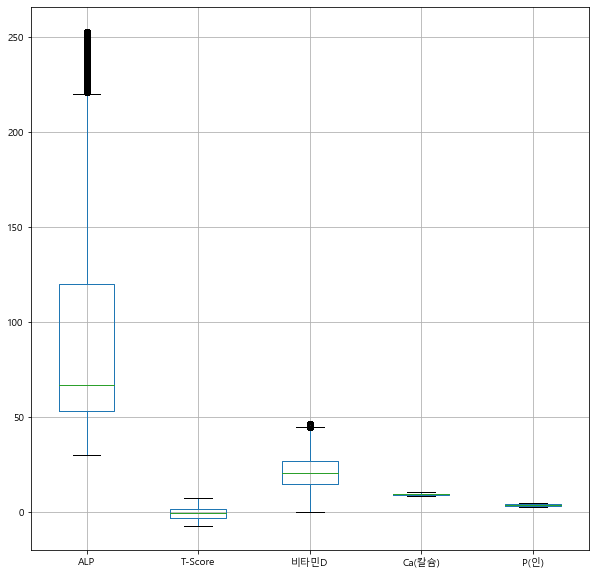

In [585]:
plt.rcParams["figure.figsize"] = (10, 10)
df_result.boxplot(column=target_cols)

In [586]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score
0,2010,7282,2520,1,42,63.0,NaN,NaN,NaN,NaN,9.0,4.1,NaN
1,2010,7490,3638,1,39,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,184.0,NaN,NaN,NaN,NaN,9.6,3.5,NaN
3,2010,8056,4745,1,42,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8457,3929,1,38,147.0,NaN,NaN,NaN,NaN,9.5,2.6,NaN


In [587]:
target_cols

['ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [588]:
len(target_cols)

5

In [589]:
target_cols_direction

['center', False, False, 'center', 'center']

In [664]:
def kde_col(df, cols):
    
    threshold = 100
#     max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                # case : center
                else:             
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in target_cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
    df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [665]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

869.21309 sec


## 검진 항목별 가중치

In [666]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean
302361,2010,609272,143,1,40,76.0,NaN,NaN,NaN,NaN,9.3,3.6,NaN,123.51,100.0,100.0,137.15,146.04,59.10
600404,2010,585711,154,1,52,60.0,NaN,NaN,NaN,NaN,9.5,3.1,NaN,147.85,100.0,100.0,141.44,110.25,65.11
505410,2010,593983,156,1,48,59.0,NaN,NaN,NaN,NaN,9.7,3.6,NaN,147.95,100.0,100.0,112.10,144.73,65.31
276092,2010,612330,185,1,39,49.0,NaN,NaN,NaN,NaN,9.9,NaN,NaN,117.42,100.0,100.0,85.06,100.00,75.77
24519,2010,645901,212,1,28,57.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,146.74,100.0,100.0,69.28,100.00,85.58


In [667]:
target_cols_kde

['ALP_kde', 'T-Score_kde', '비타민D_kde', 'Ca(칼슘)_kde', 'P(인)_kde']

In [668]:
target_cols_ratio

[3, 4, 3, 2, 2]

In [669]:
sum(target_cols_ratio)

14

In [670]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152685 entries, 302361 to 168883
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1152685 non-null  int64  
 1   UID              1152685 non-null  int64  
 2   CU_REC_ID        1152685 non-null  int64  
 3   SEX              1152685 non-null  int64  
 4   검진당시나이           1152685 non-null  int64  
 5   ALP              1012584 non-null  float64
 6   골밀도검사(BMD)       14745 non-null    float64
 7   골밀도검사(허리)        39539 non-null    float64
 8   골밀도검사 (T-Score)  13058 non-null    float64
 9   비타민D             217831 non-null   float64
 10  Ca(칼슘)           842548 non-null   float64
 11  P(인)             816812 non-null   float64
 12  T-Score          261 non-null      float64
 13  ALP_kde          1152685 non-null  float64
 14  T-Score_kde      1152685 non-null  float64
 15  비타민D_kde         1152685 non-null  float64
 16  Ca(칼슘)_kde    

In [671]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])
    + (target_cols_ratio[3] * df_target[target_cols_kde[3]])
    + (target_cols_ratio[4] * df_target[target_cols_kde[4]])
) / sum(target_cols_ratio)

In [672]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

In [673]:
df_target['kde_mean'].min()

38.36

In [674]:
df_target['kde_mean'].max()

162.57

In [675]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean
16,2019,153543,325845,1,20,180.0,NaN,NaN,NaN,11.06,9.09,NaN,NaN,11.47,100.0,99.61,47.27,100.00,73.41
14,2019,152079,325977,1,20,78.0,NaN,NaN,NaN,NaN,9.80,3.60,NaN,130.52,100.0,100.00,92.40,124.39,108.94
38,2019,392728,325980,1,20,62.0,NaN,NaN,NaN,NaN,9.60,4.50,NaN,140.58,100.0,100.00,150.00,92.92,114.83
40,2019,438481,325982,1,20,67.0,NaN,NaN,NaN,NaN,9.40,4.10,NaN,149.57,100.0,100.00,111.67,123.97,115.71
41,2019,439691,326889,1,20,67.0,NaN,NaN,NaN,NaN,10.00,4.30,NaN,149.57,100.0,100.00,94.81,110.90,111.44
15,2019,153352,327360,1,20,53.0,NaN,NaN,NaN,NaN,9.60,3.90,NaN,104.21,100.0,100.00,150.00,150.00,115.19
10,2019,130234,328771,1,20,78.0,NaN,NaN,NaN,14.70,10.20,3.60,NaN,130.52,100.0,138.91,47.65,124.39,110.88
31,2019,339160,328877,1,20,77.0,NaN,NaN,NaN,10.80,9.40,3.90,NaN,134.03,100.0,97.92,111.67,150.00,115.66
6,2019,117629,330495,1,20,60.0,NaN,NaN,NaN,NaN,9.70,4.20,NaN,134.19,100.0,100.00,127.75,109.60,112.66
29,2019,331204,330752,1,20,227.0,NaN,NaN,NaN,NaN,9.20,NaN,NaN,8.44,100.0,100.00,91.82,100.00,79.21


In [676]:
df_target['검진당시나이'].value_counts()

40    51033
38    50142
36    47901
42    46237
39    43471
37    42713
34    42589
41    42457
32    41948
30    41083
35    40010
44    39562
43    37237
46    36246
48    35851
50    35306
31    34874
33    34747
28    32461
45    32269
49    31800
47    31472
51    31124
52    30546
29    30009
53    24952
54    22715
27    22238
26    18914
55    16083
56    14381
57    11821
58    10672
25    10180
59     8354
24     6817
60     6079
23     3226
22     2452
62     1757
61     1716
21     1243
63     1221
64     1174
20     1086
65      787
66      676
67      423
68      411
69      219
Name: 검진당시나이, dtype: int64

In [677]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean
count,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.012584e+06,14745.000000,39539.000000,13058.000000,217831.000000,842548.000000,816812.000000,261.000000,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06
mean,2.021879e+03,5.100164e+05,1.493836e+06,1.372877e+00,4.062581e+01,9.100390e+01,-0.454284,-0.179200,0.180681,21.438653,9.338207,3.585902,-0.459387,9.312139e+01,1.000003e+02,1.021057e+02,1.054522e+02,1.048168e+02,1.004443e+02
std,1.699580e+00,3.661403e+05,7.930328e+05,4.835701e-01,8.914989e+00,5.489210e+01,1.201793,1.145272,1.159580,8.564308,0.440093,0.444064,3.272784,4.878397e+01,3.699959e-01,1.686056e+01,3.452718e+01,3.458490e+01,1.332797e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,3.000000e+01,-3.840000,-5.200000,-2.900000,0.000000,8.110000,2.400000,-7.300000,2.600000e-01,0.000000e+00,7.000000e-02,6.600000e-01,1.100000e-01,3.836000e+01
25%,2.021000e+03,2.215910e+05,6.820350e+05,1.000000e+00,3.400000e+01,5.300000e+01,-1.300000,-1.000000,-0.600000,14.900000,9.000000,3.300000,-3.000000,3.489000e+01,1.000000e+02,1.000000e+02,9.742000e+01,9.673000e+01,9.094000e+01
50%,2.022000e+03,3.812290e+05,1.409761e+06,1.000000e+00,4.000000e+01,6.700000e+01,-0.500000,-0.200000,0.200000,20.400000,9.310000,3.600000,-0.600000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,2.023000e+03,8.382450e+05,2.174771e+06,2.000000e+00,4.700000e+01,1.200000e+02,0.400000,0.600000,1.000000,26.900000,9.600000,3.900000,1.700000,1.391000e+02,1.000000e+02,1.000000e+02,1.363400e+02,1.356200e+02,1.102600e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.530000e+02,3.300000,6.500000,3.000000,46.520000,10.500000,4.800000,7.500000,1.500600e+02,2.000000e+02,1.998700e+02,1.518200e+02,1.510100e+02,1.625700e+02


<AxesSubplot:>

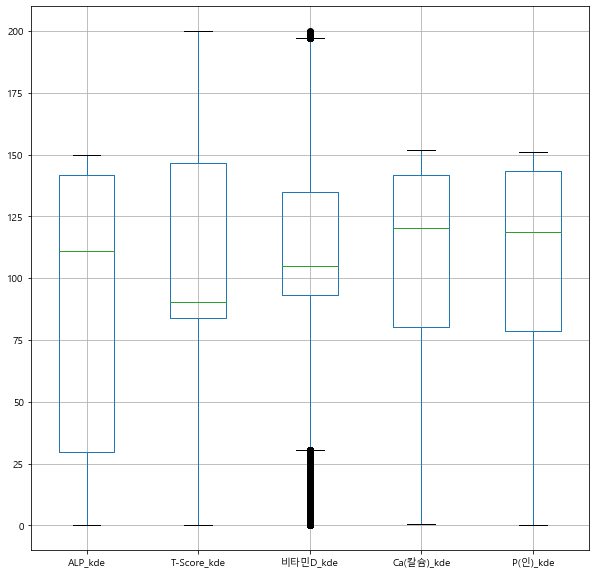

In [678]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['ALP_kde', 'T-Score_kde', '비타민D_kde', 'Ca(칼슘)_kde', 'P(인)_kde'])

<AxesSubplot:>

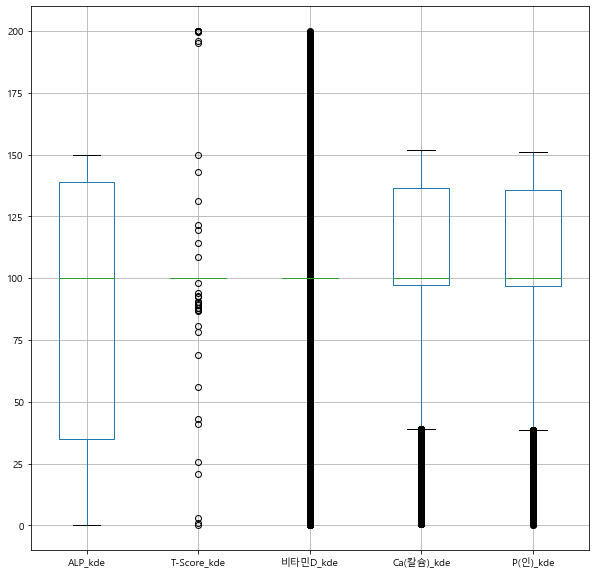

In [679]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['ALP_kde', 'T-Score_kde', '비타민D_kde', 'Ca(칼슘)_kde', 'P(인)_kde'])

## target Scaling

In [680]:
df_target['kde_mean'].min()

38.36

In [681]:
df_target['kde_mean'].max()

162.57

In [682]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [683]:
df_target['target'] = (df_target['target'] * 100) + 50

In [684]:
df_target['target'] = df_target['target'].round(0)

In [685]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
54,69.0,2
53,70.0,3
51,71.0,8
50,72.0,11
49,73.0,27
48,74.0,33
47,75.0,53
46,76.0,62
44,77.0,133
42,78.0,281


<AxesSubplot:>

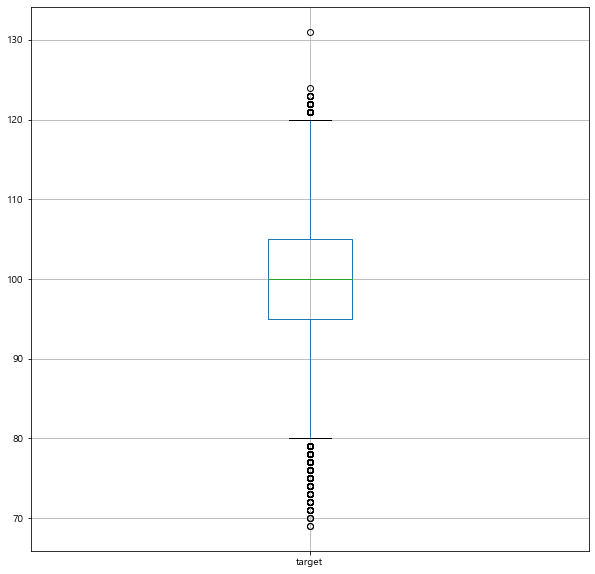

In [686]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

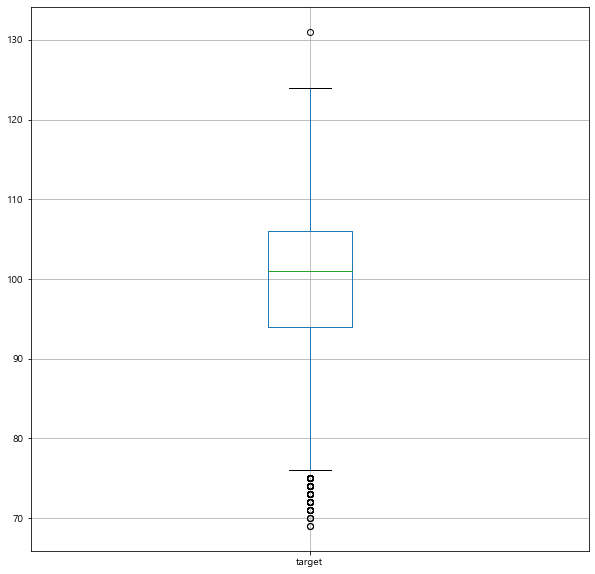

In [687]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

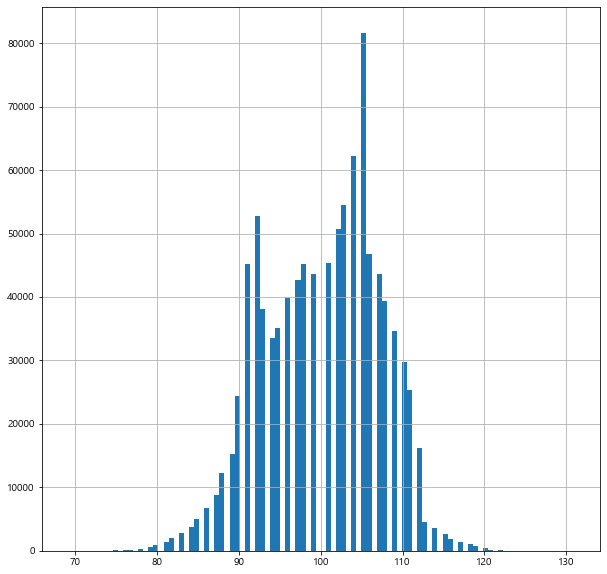

In [688]:
df_boxplot['target'].hist(bins=100)

In [689]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
count,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.012584e+06,14745.000000,39539.000000,13058.000000,217831.000000,842548.000000,816812.000000,261.000000,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06,1.152685e+06
mean,2.021879e+03,5.100164e+05,1.493836e+06,1.372877e+00,4.062581e+01,9.100390e+01,-0.454284,-0.179200,0.180681,21.438653,9.338207,3.585902,-0.459387,9.312139e+01,1.000003e+02,1.021057e+02,1.054522e+02,1.048168e+02,1.004443e+02,1.002171e+02
std,1.699580e+00,3.661403e+05,7.930328e+05,4.835701e-01,8.914989e+00,5.489210e+01,1.201793,1.145272,1.159580,8.564308,0.440093,0.444064,3.272784,4.878397e+01,3.699959e-01,1.686056e+01,3.452718e+01,3.458490e+01,1.332797e+01,6.666968e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,3.000000e+01,-3.840000,-5.200000,-2.900000,0.000000,8.110000,2.400000,-7.300000,2.600000e-01,0.000000e+00,7.000000e-02,6.600000e-01,1.100000e-01,3.836000e+01,6.900000e+01
25%,2.021000e+03,2.215910e+05,6.820350e+05,1.000000e+00,3.400000e+01,5.300000e+01,-1.300000,-1.000000,-0.600000,14.900000,9.000000,3.300000,-3.000000,3.489000e+01,1.000000e+02,1.000000e+02,9.742000e+01,9.673000e+01,9.094000e+01,9.500000e+01
50%,2.022000e+03,3.812290e+05,1.409761e+06,1.000000e+00,4.000000e+01,6.700000e+01,-0.500000,-0.200000,0.200000,20.400000,9.310000,3.600000,-0.600000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
75%,2.023000e+03,8.382450e+05,2.174771e+06,2.000000e+00,4.700000e+01,1.200000e+02,0.400000,0.600000,1.000000,26.900000,9.600000,3.900000,1.700000,1.391000e+02,1.000000e+02,1.000000e+02,1.363400e+02,1.356200e+02,1.102600e+02,1.050000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,2.530000e+02,3.300000,6.500000,3.000000,46.520000,10.500000,4.800000,7.500000,1.500600e+02,2.000000e+02,1.998700e+02,1.518200e+02,1.510100e+02,1.625700e+02,1.310000e+02


In [690]:
df_target.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
302361,2010,609272,143,1,40,76.0,NaN,NaN,NaN,NaN,9.3,3.6,NaN,123.51,100.0,100.0,137.15,146.04,116.92,108.0
600404,2010,585711,154,1,52,60.0,NaN,NaN,NaN,NaN,9.5,3.1,NaN,147.85,100.0,100.0,141.44,110.25,117.64,109.0
505410,2010,593983,156,1,48,59.0,NaN,NaN,NaN,NaN,9.7,3.6,NaN,147.95,100.0,100.0,112.10,144.73,118.39,109.0
276092,2010,612330,185,1,39,49.0,NaN,NaN,NaN,NaN,9.9,NaN,NaN,117.42,100.0,100.0,85.06,100.00,101.60,101.0
24519,2010,645901,212,1,28,57.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,146.74,100.0,100.0,69.28,100.00,105.63,103.0
764538,2010,710490,213,2,28,45.0,NaN,NaN,NaN,NaN,9.5,NaN,NaN,147.73,100.0,100.0,124.43,100.00,113.72,107.0
439130,2010,491012,226,1,45,74.0,NaN,NaN,NaN,NaN,9.8,NaN,NaN,125.82,100.0,100.0,79.49,100.00,102.60,101.0
726265,2010,315847,230,2,23,50.0,NaN,NaN,NaN,NaN,9.6,NaN,NaN,149.06,100.0,100.0,135.14,100.00,115.53,108.0
728598,2010,719072,231,2,24,57.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,137.00,100.0,100.0,46.91,100.00,100.34,100.0
246326,2010,614169,238,1,38,45.0,NaN,NaN,NaN,NaN,9.9,NaN,NaN,101.01,100.0,100.0,95.11,100.00,99.52,100.0


## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

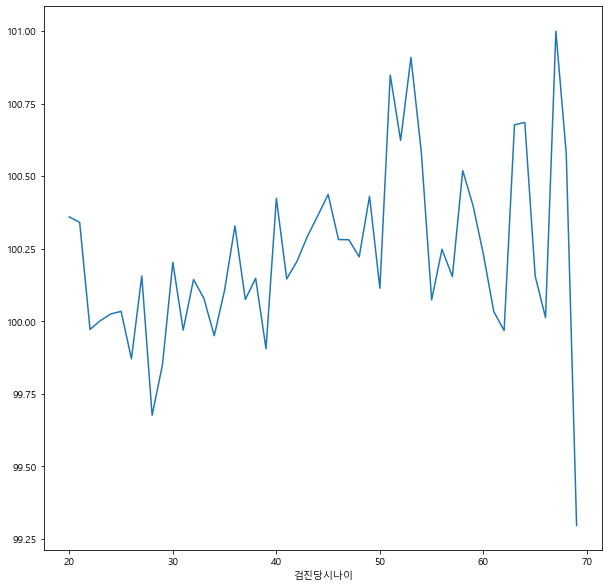

In [691]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

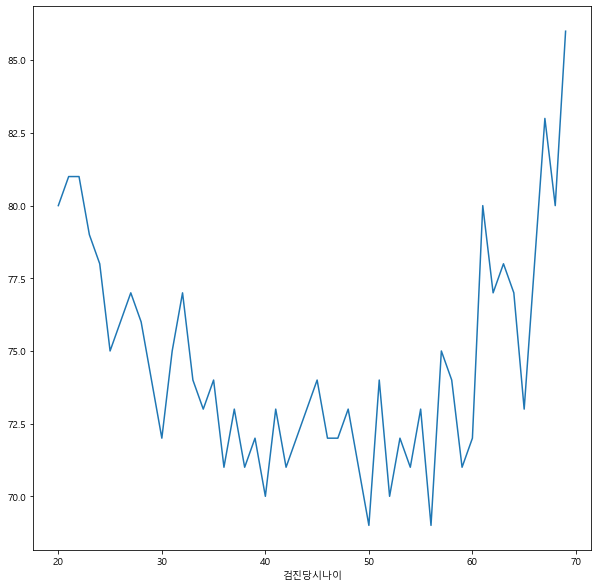

In [692]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

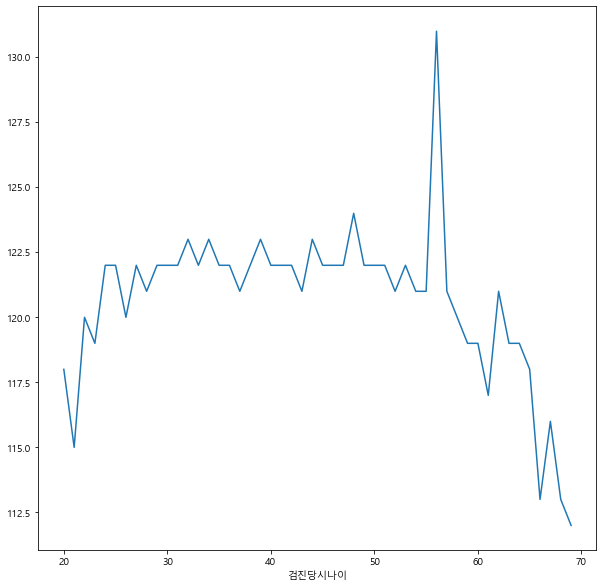

In [693]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [694]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
302361,2010,609272,143,1,40,76.0,NaN,NaN,NaN,NaN,9.3,3.6,NaN,123.51,100.0,100.0,137.15,146.04,116.92,108.0
600404,2010,585711,154,1,52,60.0,NaN,NaN,NaN,NaN,9.5,3.1,NaN,147.85,100.0,100.0,141.44,110.25,117.64,109.0
505410,2010,593983,156,1,48,59.0,NaN,NaN,NaN,NaN,9.7,3.6,NaN,147.95,100.0,100.0,112.10,144.73,118.39,109.0
276092,2010,612330,185,1,39,49.0,NaN,NaN,NaN,NaN,9.9,NaN,NaN,117.42,100.0,100.0,85.06,100.00,101.60,101.0
24519,2010,645901,212,1,28,57.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,146.74,100.0,100.0,69.28,100.00,105.63,103.0


# 결측행 제거

In [695]:
# df_result.dropna(axis=0).info()

In [696]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [697]:
df_target['SEX'].value_counts()

1    722875
2    429810
Name: SEX, dtype: int64

In [698]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

722875

In [699]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
302361,2010,609272,143,1,40,76.0,NaN,NaN,NaN,NaN,9.3,3.6,NaN,123.51,100.0,100.0,137.15,146.04,116.92,108.0
600404,2010,585711,154,1,52,60.0,NaN,NaN,NaN,NaN,9.5,3.1,NaN,147.85,100.0,100.0,141.44,110.25,117.64,109.0
505410,2010,593983,156,1,48,59.0,NaN,NaN,NaN,NaN,9.7,3.6,NaN,147.95,100.0,100.0,112.10,144.73,118.39,109.0
276092,2010,612330,185,1,39,49.0,NaN,NaN,NaN,NaN,9.9,NaN,NaN,117.42,100.0,100.0,85.06,100.00,101.60,101.0
24519,2010,645901,212,1,28,57.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,146.74,100.0,100.0,69.28,100.00,105.63,103.0


# 결측치 처리

## 결측치 삭제

In [700]:
# df_man.dropna(inplace=True)

In [701]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
302361,2010,609272,143,1,40,76.0,NaN,NaN,NaN,NaN,9.3,3.6,NaN,123.51,100.0,100.0,137.15,146.04,116.92,108.0
600404,2010,585711,154,1,52,60.0,NaN,NaN,NaN,NaN,9.5,3.1,NaN,147.85,100.0,100.0,141.44,110.25,117.64,109.0
505410,2010,593983,156,1,48,59.0,NaN,NaN,NaN,NaN,9.7,3.6,NaN,147.95,100.0,100.0,112.10,144.73,118.39,109.0
276092,2010,612330,185,1,39,49.0,NaN,NaN,NaN,NaN,9.9,NaN,NaN,117.42,100.0,100.0,85.06,100.00,101.60,101.0
24519,2010,645901,212,1,28,57.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,146.74,100.0,100.0,69.28,100.00,105.63,103.0


## 결측치 평균으로 대체

In [702]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [703]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [704]:
target_cols

['ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [705]:
len(df_man)

722875

In [706]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [707]:
len(df_man)

660316

In [708]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
302361,2010,609272,143,1,40,76.0,NaN,NaN,NaN,NaN,9.3,3.6,NaN,123.51,100.0,100.0,137.15,146.04,116.92,108.0
600404,2010,585711,154,1,52,60.0,NaN,NaN,NaN,NaN,9.5,3.1,NaN,147.85,100.0,100.0,141.44,110.25,117.64,109.0
505410,2010,593983,156,1,48,59.0,NaN,NaN,NaN,NaN,9.7,3.6,NaN,147.95,100.0,100.0,112.10,144.73,118.39,109.0
276092,2010,612330,185,1,39,49.0,NaN,NaN,NaN,NaN,9.9,NaN,NaN,117.42,100.0,100.0,85.06,100.00,101.60,101.0
24519,2010,645901,212,1,28,57.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,146.74,100.0,100.0,69.28,100.00,105.63,103.0


## fillna

In [709]:
df_man.mean().round(2)

검진년도                  2022.00
UID                 510385.40
CU_REC_ID          1480972.26
SEX                      1.00
검진당시나이                  42.21
ALP                     96.24
골밀도검사(BMD)              -0.41
골밀도검사(허리)               -0.20
골밀도검사 (T-Score)          0.13
비타민D                    21.74
Ca(칼슘)                   9.40
P(인)                     3.52
T-Score                  0.36
ALP_kde                 92.79
T-Score_kde            100.00
비타민D_kde               102.12
Ca(칼슘)_kde             105.95
P(인)_kde               104.84
kde_mean               100.45
target                 100.22
dtype: float64

In [710]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [711]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [712]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [713]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [714]:
len(df_man)

660316

In [715]:
len(df_man)

660316

In [716]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [717]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
2289,2011,32,11757,1,24,73.00,-0.41,-0.5,0.13,21.74,8.7,2.70,0.36,124.08,100.0,100.00,33.99,5.76,82.27,91.0
623694,2019,50,356493,1,53,50.00,-0.41,-0.2,0.13,27.30,8.6,4.00,0.36,124.21,100.0,114.35,43.65,75.56,96.72,98.0
663433,2021,50,642497,1,55,53.00,-0.41,-0.2,0.13,25.80,8.8,2.90,0.36,131.37,100.0,125.51,69.66,60.66,102.23,101.0
302965,2019,62,421626,1,40,168.00,-0.41,-0.2,0.13,21.74,9.3,3.50,0.36,31.09,100.0,100.00,137.15,150.00,97.68,99.0
336110,2020,62,565527,1,41,162.00,-0.41,-0.2,0.13,21.74,8.9,3.60,0.36,22.07,100.0,100.00,80.36,136.56,85.72,93.0
366295,2021,62,699357,1,42,152.00,-0.41,-0.2,0.13,21.74,8.9,3.50,0.36,19.05,100.0,100.00,78.30,149.82,86.67,93.0
396869,2022,62,1356310,1,43,59.00,-0.41,-0.2,0.13,15.70,9.4,3.52,0.36,147.19,100.0,94.19,100.00,100.00,108.87,104.0
427575,2023,62,2170394,1,44,61.00,-0.41,-0.2,0.13,15.70,9.5,3.40,0.36,149.28,100.0,88.37,149.95,147.35,121.97,111.0
577553,2019,67,410099,1,51,52.00,-0.41,-0.2,0.13,21.74,9.0,3.20,0.36,131.00,100.0,100.00,94.98,132.59,110.58,105.0
602575,2020,67,481109,1,52,53.00,-0.41,-0.2,0.13,21.74,9.2,3.20,0.36,128.88,100.0,100.00,139.60,130.87,116.26,108.0


In [718]:
len(df_man)

660316

In [719]:
df_man[target_cols]

,ALP,T-Score,비타민D,Ca(칼슘),P(인)
2289,73.0,0.36,21.74,8.7,2.70
623694,50.0,0.36,27.30,8.6,4.00
663433,53.0,0.36,25.80,8.8,2.90
302965,168.0,0.36,21.74,9.3,3.50
336110,162.0,0.36,21.74,8.9,3.60
...,...,...,...,...,...
721404,83.0,0.36,21.74,9.4,3.52
721403,83.0,0.36,21.74,9.4,3.52
51477,58.0,0.36,21.74,9.4,3.52
11803,83.0,0.36,14.40,10.0,3.40


## first만 남겨두고 중복 제거

In [720]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [721]:
len(df_man)

556346

In [722]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
2289,2011,32,11757,1,24,73.00,-0.41,-0.5,0.13,21.74,8.7,2.70,0.36,124.08,100.0,100.00,33.99,5.76,82.27,91.0
623694,2019,50,356493,1,53,50.00,-0.41,-0.2,0.13,27.30,8.6,4.00,0.36,124.21,100.0,114.35,43.65,75.56,96.72,98.0
663433,2021,50,642497,1,55,53.00,-0.41,-0.2,0.13,25.80,8.8,2.90,0.36,131.37,100.0,125.51,69.66,60.66,102.23,101.0
302965,2019,62,421626,1,40,168.00,-0.41,-0.2,0.13,21.74,9.3,3.50,0.36,31.09,100.0,100.00,137.15,150.00,97.68,99.0
336110,2020,62,565527,1,41,162.00,-0.41,-0.2,0.13,21.74,8.9,3.60,0.36,22.07,100.0,100.00,80.36,136.56,85.72,93.0
366295,2021,62,699357,1,42,152.00,-0.41,-0.2,0.13,21.74,8.9,3.50,0.36,19.05,100.0,100.00,78.30,149.82,86.67,93.0
396869,2022,62,1356310,1,43,59.00,-0.41,-0.2,0.13,15.70,9.4,3.52,0.36,147.19,100.0,94.19,100.00,100.00,108.87,104.0
427575,2023,62,2170394,1,44,61.00,-0.41,-0.2,0.13,15.70,9.5,3.40,0.36,149.28,100.0,88.37,149.95,147.35,121.97,111.0
577553,2019,67,410099,1,51,52.00,-0.41,-0.2,0.13,21.74,9.0,3.20,0.36,131.00,100.0,100.00,94.98,132.59,110.58,105.0
602575,2020,67,481109,1,52,53.00,-0.41,-0.2,0.13,21.74,9.2,3.20,0.36,128.88,100.0,100.00,139.60,130.87,116.26,108.0


In [723]:
df_man.reset_index(drop=True, inplace=True)

In [724]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
0,2011,32,11757,1,24,73.0,-0.41,-0.5,0.13,21.74,8.7,2.7,0.36,124.08,100.0,100.00,33.99,5.76,82.27,91.0
1,2019,50,356493,1,53,50.0,-0.41,-0.2,0.13,27.30,8.6,4.0,0.36,124.21,100.0,114.35,43.65,75.56,96.72,98.0
2,2021,50,642497,1,55,53.0,-0.41,-0.2,0.13,25.80,8.8,2.9,0.36,131.37,100.0,125.51,69.66,60.66,102.23,101.0
3,2019,62,421626,1,40,168.0,-0.41,-0.2,0.13,21.74,9.3,3.5,0.36,31.09,100.0,100.00,137.15,150.00,97.68,99.0
4,2020,62,565527,1,41,162.0,-0.41,-0.2,0.13,21.74,8.9,3.6,0.36,22.07,100.0,100.00,80.36,136.56,85.72,93.0


In [725]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556346 entries, 0 to 556345
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   검진년도             556346 non-null  int64  
 1   UID              556346 non-null  int64  
 2   CU_REC_ID        556346 non-null  int64  
 3   SEX              556346 non-null  int64  
 4   검진당시나이           556346 non-null  int64  
 5   ALP              556346 non-null  float64
 6   골밀도검사(BMD)       556346 non-null  float64
 7   골밀도검사(허리)        556346 non-null  float64
 8   골밀도검사 (T-Score)  556346 non-null  float64
 9   비타민D             556346 non-null  float64
 10  Ca(칼슘)           556346 non-null  float64
 11  P(인)             556346 non-null  float64
 12  T-Score          556346 non-null  float64
 13  ALP_kde          556346 non-null  float64
 14  T-Score_kde      556346 non-null  float64
 15  비타민D_kde         556346 non-null  float64
 16  Ca(칼슘)_kde       556346 non-null  floa

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

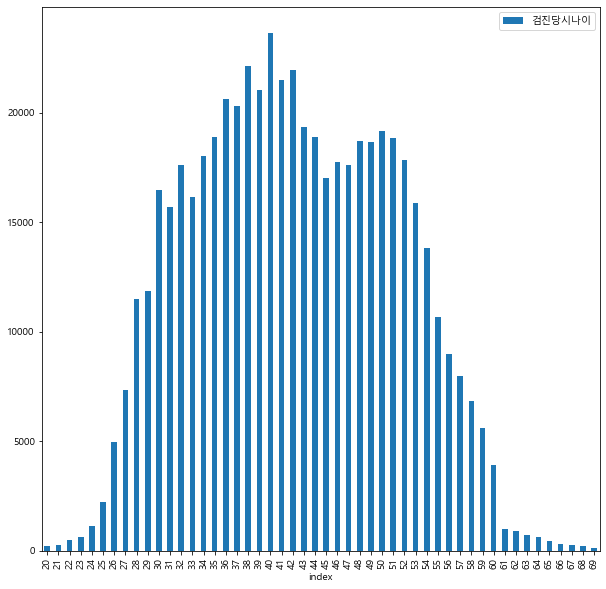

In [726]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [727]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
48,20,194
45,21,276
42,22,459
40,23,631
36,24,1141
35,25,2228
33,26,4942
30,27,7336
26,28,11474
25,29,11873


# 검진항목 시각화

In [728]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
count,556346.000000,5.563460e+05,5.563460e+05,556346.0,556346.000000,556346.000000,556346.000000,556346.000000,556346.000000,556346.000000,556346.000000,556346.000000,556346.000000,556346.00000,556346.000000,556346.000000,556346.000000,556346.000000,556346.000000,556346.000000
mean,2021.953953,5.058872e+05,1.477468e+06,1.0,42.175829,97.346734,-0.410481,-0.200391,0.129987,21.729903,9.398628,3.518601,0.359992,91.80978,99.999418,102.012216,105.817243,104.751490,100.185783,100.086617
std,1.638425,3.613276e+05,8.175228e+05,0.0,8.809710,56.243121,0.142967,0.216843,0.116654,3.801130,0.388416,0.387239,0.049176,51.11268,0.281902,18.000650,36.276271,36.365446,13.980398,6.993889
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,30.000000,-3.840000,-5.200000,-2.900000,0.000000,8.110000,2.400000,-6.600000,2.42000,0.960000,0.070000,0.780000,0.540000,38.360000,69.000000
25%,2021.000000,2.220170e+05,6.410338e+05,1.0,35.000000,58.000000,-0.410000,-0.200000,0.130000,21.740000,9.200000,3.300000,0.360000,30.39000,100.000000,100.000000,90.605000,91.310000,89.070000,95.000000
50%,2022.000000,3.804550e+05,1.386216e+06,1.0,42.000000,72.000000,-0.410000,-0.200000,0.130000,21.740000,9.400000,3.520000,0.360000,106.05000,100.000000,100.000000,103.450000,100.000000,101.590000,101.000000
75%,2023.000000,8.313130e+05,2.190370e+06,1.0,49.000000,128.000000,-0.410000,-0.200000,0.130000,21.740000,9.600000,3.700000,0.360000,140.68000,100.000000,100.000000,138.370000,137.200000,110.600000,105.000000
max,2024.000000,1.473602e+06,2.871357e+06,1.0,69.000000,253.000000,3.300000,6.500000,3.000000,46.520000,10.500000,4.800000,7.500000,150.05000,195.930000,199.870000,151.040000,151.010000,162.570000,131.000000


<AxesSubplot:xlabel='검진당시나이'>

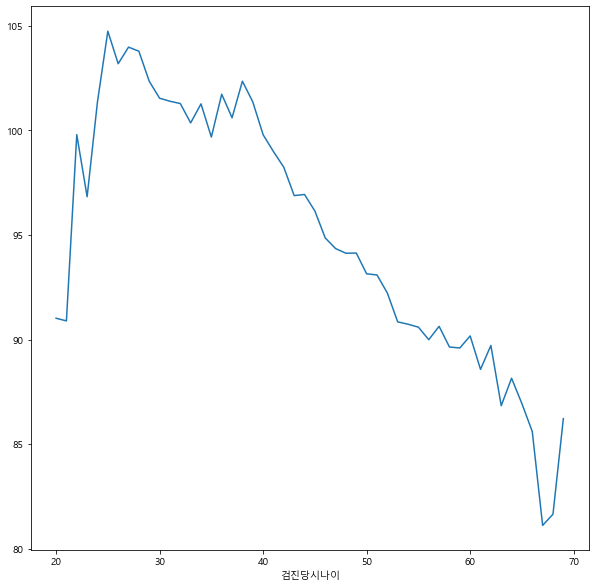

In [729]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

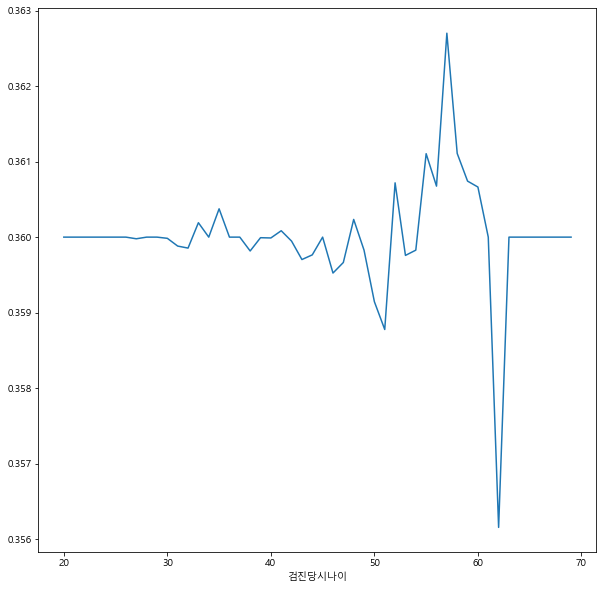

In [730]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

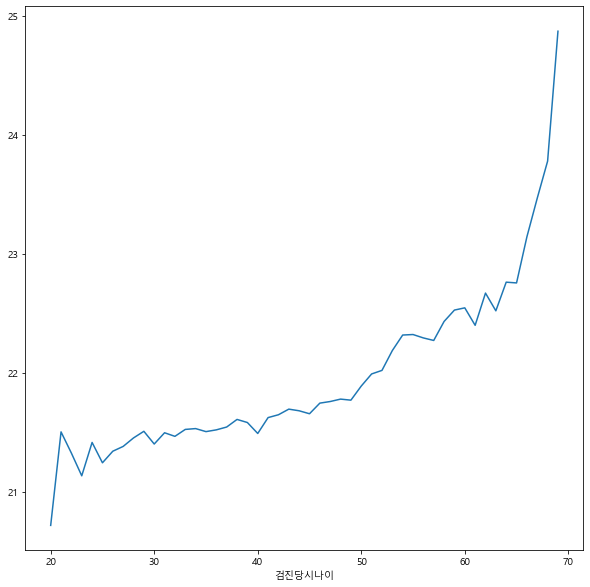

In [731]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

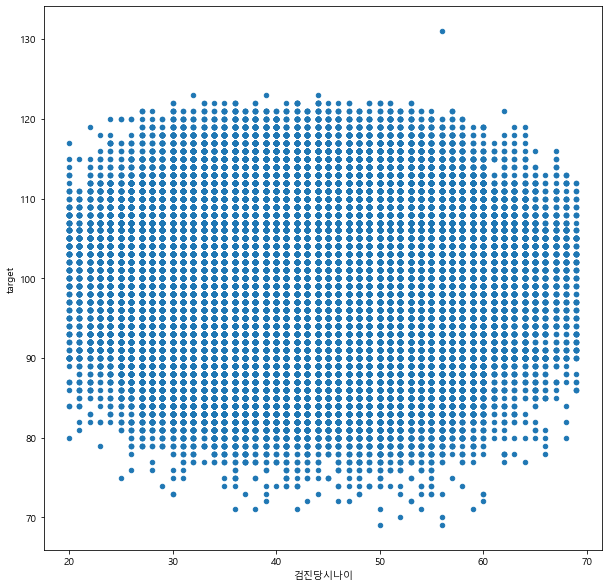

In [732]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

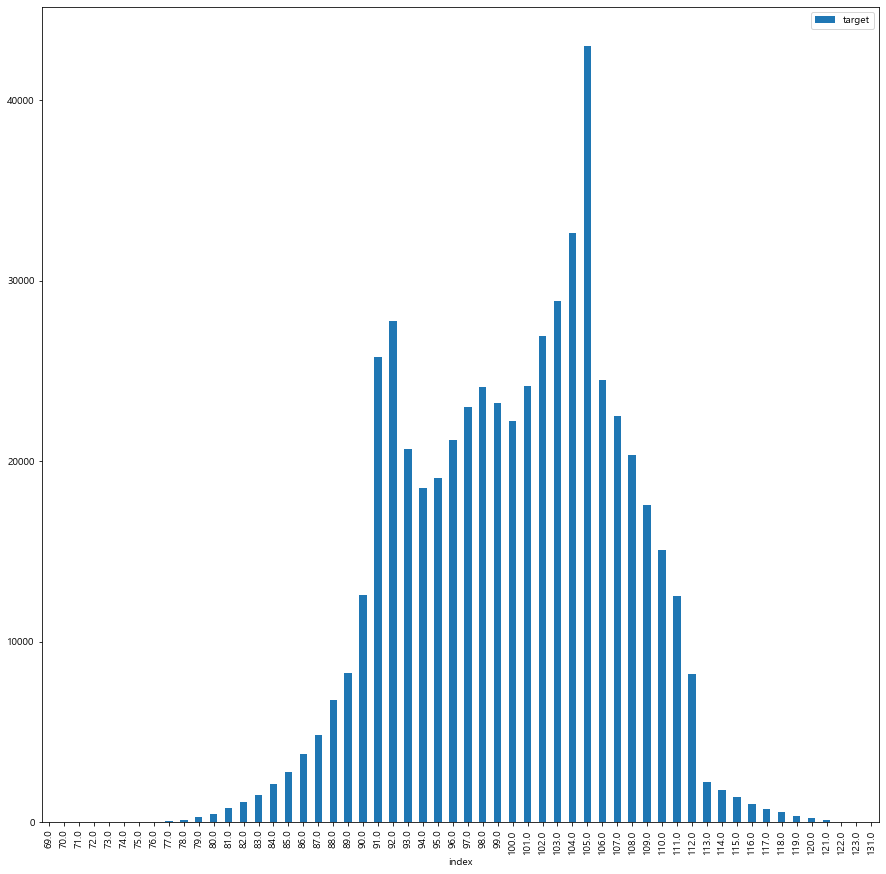

In [733]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [734]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
53,69.0,2
54,70.0,2
51,71.0,6
50,72.0,7
49,73.0,14
48,74.0,26
47,75.0,31
45,76.0,40
44,77.0,91
42,78.0,160


In [735]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [736]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

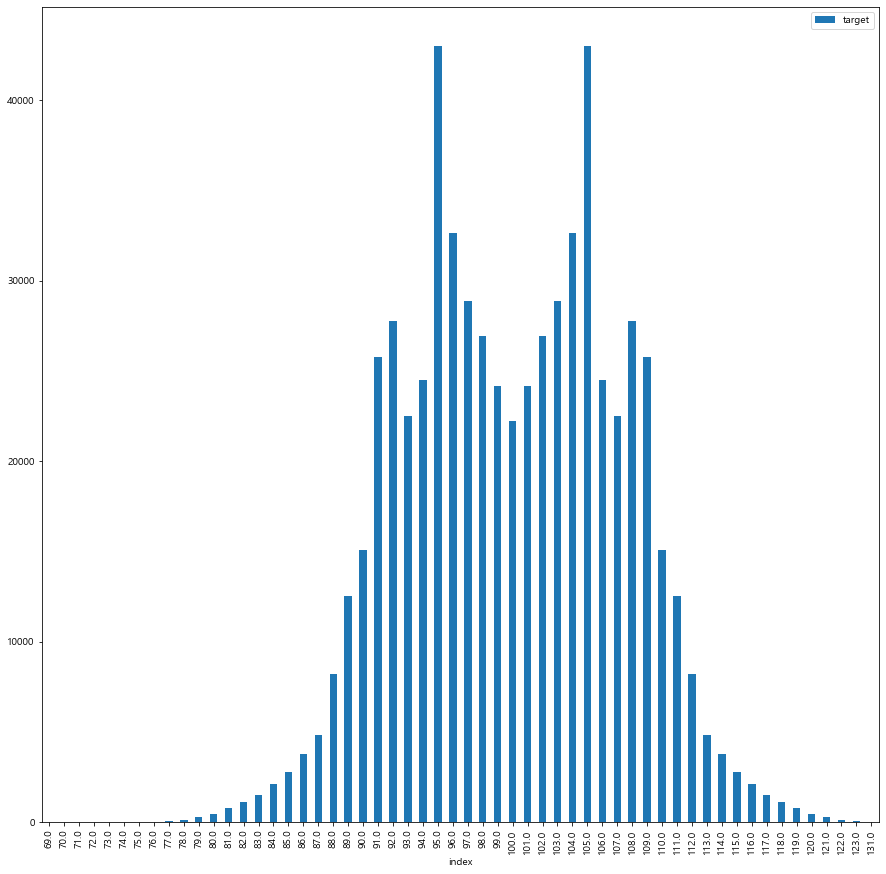

In [737]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [738]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
55,69.0,2
53,70.0,2
52,71.0,6
51,72.0,7
50,73.0,14
49,74.0,26
48,75.0,31
47,76.0,40
46,77.0,91
44,78.0,160


# 나이별 확인하기

In [181]:
# target = 'target'

In [182]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [183]:
# df_man = df_man_sample

In [184]:
# int(df_man['검진당시나이'].value_counts().mean())

In [185]:
# df_man['검진당시나이'].min()

In [186]:
# df_man['검진당시나이'].max()

In [187]:
# df_man.columns

In [188]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [189]:
# df_temp.info()

In [190]:
# df_temp.reset_index(drop=True, inplace=True)

In [191]:
# df_man = df_temp.copy()

In [192]:
# df_man['검진당시나이'].value_counts()

In [193]:
# df_man[df_man['검진당시나이']==38]

In [194]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [195]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'ALP', '골밀도검사(BMD)',
       '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)', 'T-Score',
       'ALP_kde', 'T-Score_kde', '비타민D_kde', 'Ca(칼슘)_kde', 'P(인)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [196]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [197]:
target_cols

['ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [198]:
train_columns = target_cols.copy()

In [199]:
train_columns.insert(0, '검진당시나이')

In [200]:
train_columns

['검진당시나이', 'ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [201]:
target_col = 'target'

## Min Max Scaling

In [202]:
from sklearn.preprocessing import MinMaxScaler

In [203]:
scaling_bool

False

In [204]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [205]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [206]:
# model = LinearRegression()

In [207]:
# model.fit(X_train, y_train)

In [208]:
# model.intercept_

In [209]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [210]:
model = XGBRegressor()

In [211]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [212]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [213]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 2602.94 seconds for 10 candidates parameter settings.


In [214]:
# best parameter
random_search.best_params_

{'objective': 'reg:squarederror',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.4,
 'booster': 'gbtree'}

In [215]:
# best score
random_search.best_score_

-0.21964528414020554

In [216]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.4,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.400000006,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

## Keras

In [217]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [218]:
# model = build_model()

In [219]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [220]:
# model.summary()

In [221]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [222]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [223]:
# plot_history(history)

## pyTorch 신경망

In [224]:
np.shape(X_train)[1]

6

In [225]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [226]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [227]:
# epochs = 1000

In [228]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [229]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [230]:
# plt.plot(losses)

## coef 계산

In [231]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [232]:
# df_coef.columns = ['검사항목', 'coef']

In [233]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [234]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [235]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [236]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [237]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [238]:
# slr = LinearRegression()

In [239]:
# slr.fit(X_train_poly, y_train)

In [240]:
# np.shape(X_train)

In [241]:
# np.shape(X_train_poly)

In [242]:
# np.shape(X_test)

In [243]:
# np.shape(X_test_poly)

In [244]:
# y_pred_poly = slr.predict(X_test_poly)

In [245]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [246]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [247]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [248]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [249]:
pyTorch_bool

False

In [250]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [251]:
XGB_bool

True

In [252]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [253]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.320690148807152
MSE : 0.20977529693053212
RMSE : 0.45801233272755015


In [254]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9958837904715009

In [255]:
model.score(X_test, y_test)

0.9958837904715009

## feature importance

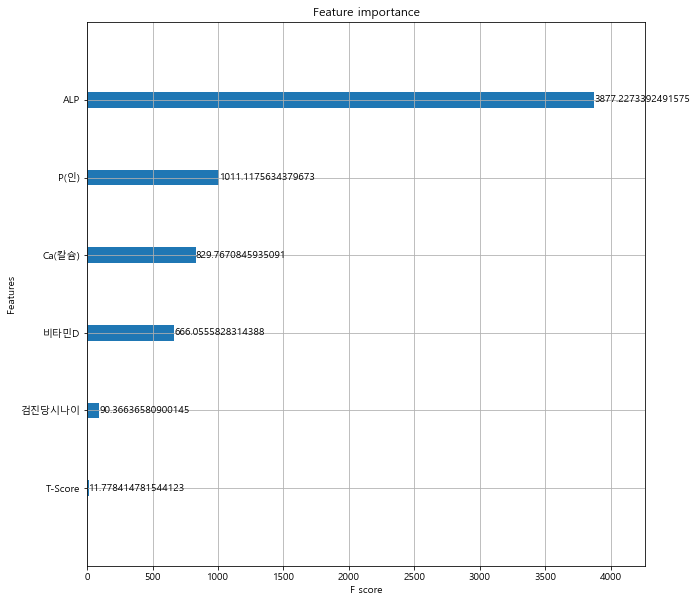

In [256]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [257]:
model.feature_importances_

array([0.01393185, 0.59775525, 0.00181589, 0.10268632, 0.12792586,
       0.1558848 ], dtype=float32)

In [258]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [259]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,ALP,0.597755
5,P(인),0.155885
4,Ca(칼슘),0.127926
3,비타민D,0.102686
0,검진당시나이,0.013932
2,T-Score,0.001816


# 실제지수 - 예측지수 결과

In [260]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,107.0
1,92.0
2,95.0
3,105.0
4,97.0
...,...
160623,94.0
160624,117.0
160625,106.0
160626,97.0


In [261]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,106.899200
1,92.500771
2,95.285698
3,105.500595
4,96.327751
...,...
160623,93.746315
160624,117.243713
160625,105.874176
160626,97.691719


In [262]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [263]:
df_test.head()

,target,0
0,107.0,106.899200
1,92.0,92.500771
2,95.0,95.285698
3,105.0,105.500595
4,97.0,96.327751


In [264]:
df_test.columns

Index(['target', 0], dtype='object')

In [265]:
df_test.columns = ['실제지수', '예측지수']

In [266]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [267]:
df_test.head()

,실제지수,예측지수,diff
0,107.0,106.899200,-0.100800
1,92.0,92.500771,0.500771
2,95.0,95.285698,0.285698
3,105.0,105.500595,0.500595
4,97.0,96.327751,-0.672249


In [268]:
df_test['diff_int'] = df_test['diff'].round(0)

In [269]:
len(df_test)

160628

In [270]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,107.0,106.899200,-0.100800,-0.0
1,92.0,92.500771,0.500771,1.0
2,95.0,95.285698,0.285698,0.0
3,105.0,105.500595,0.500595,1.0
4,97.0,96.327751,-0.672249,-1.0


<AxesSubplot:>

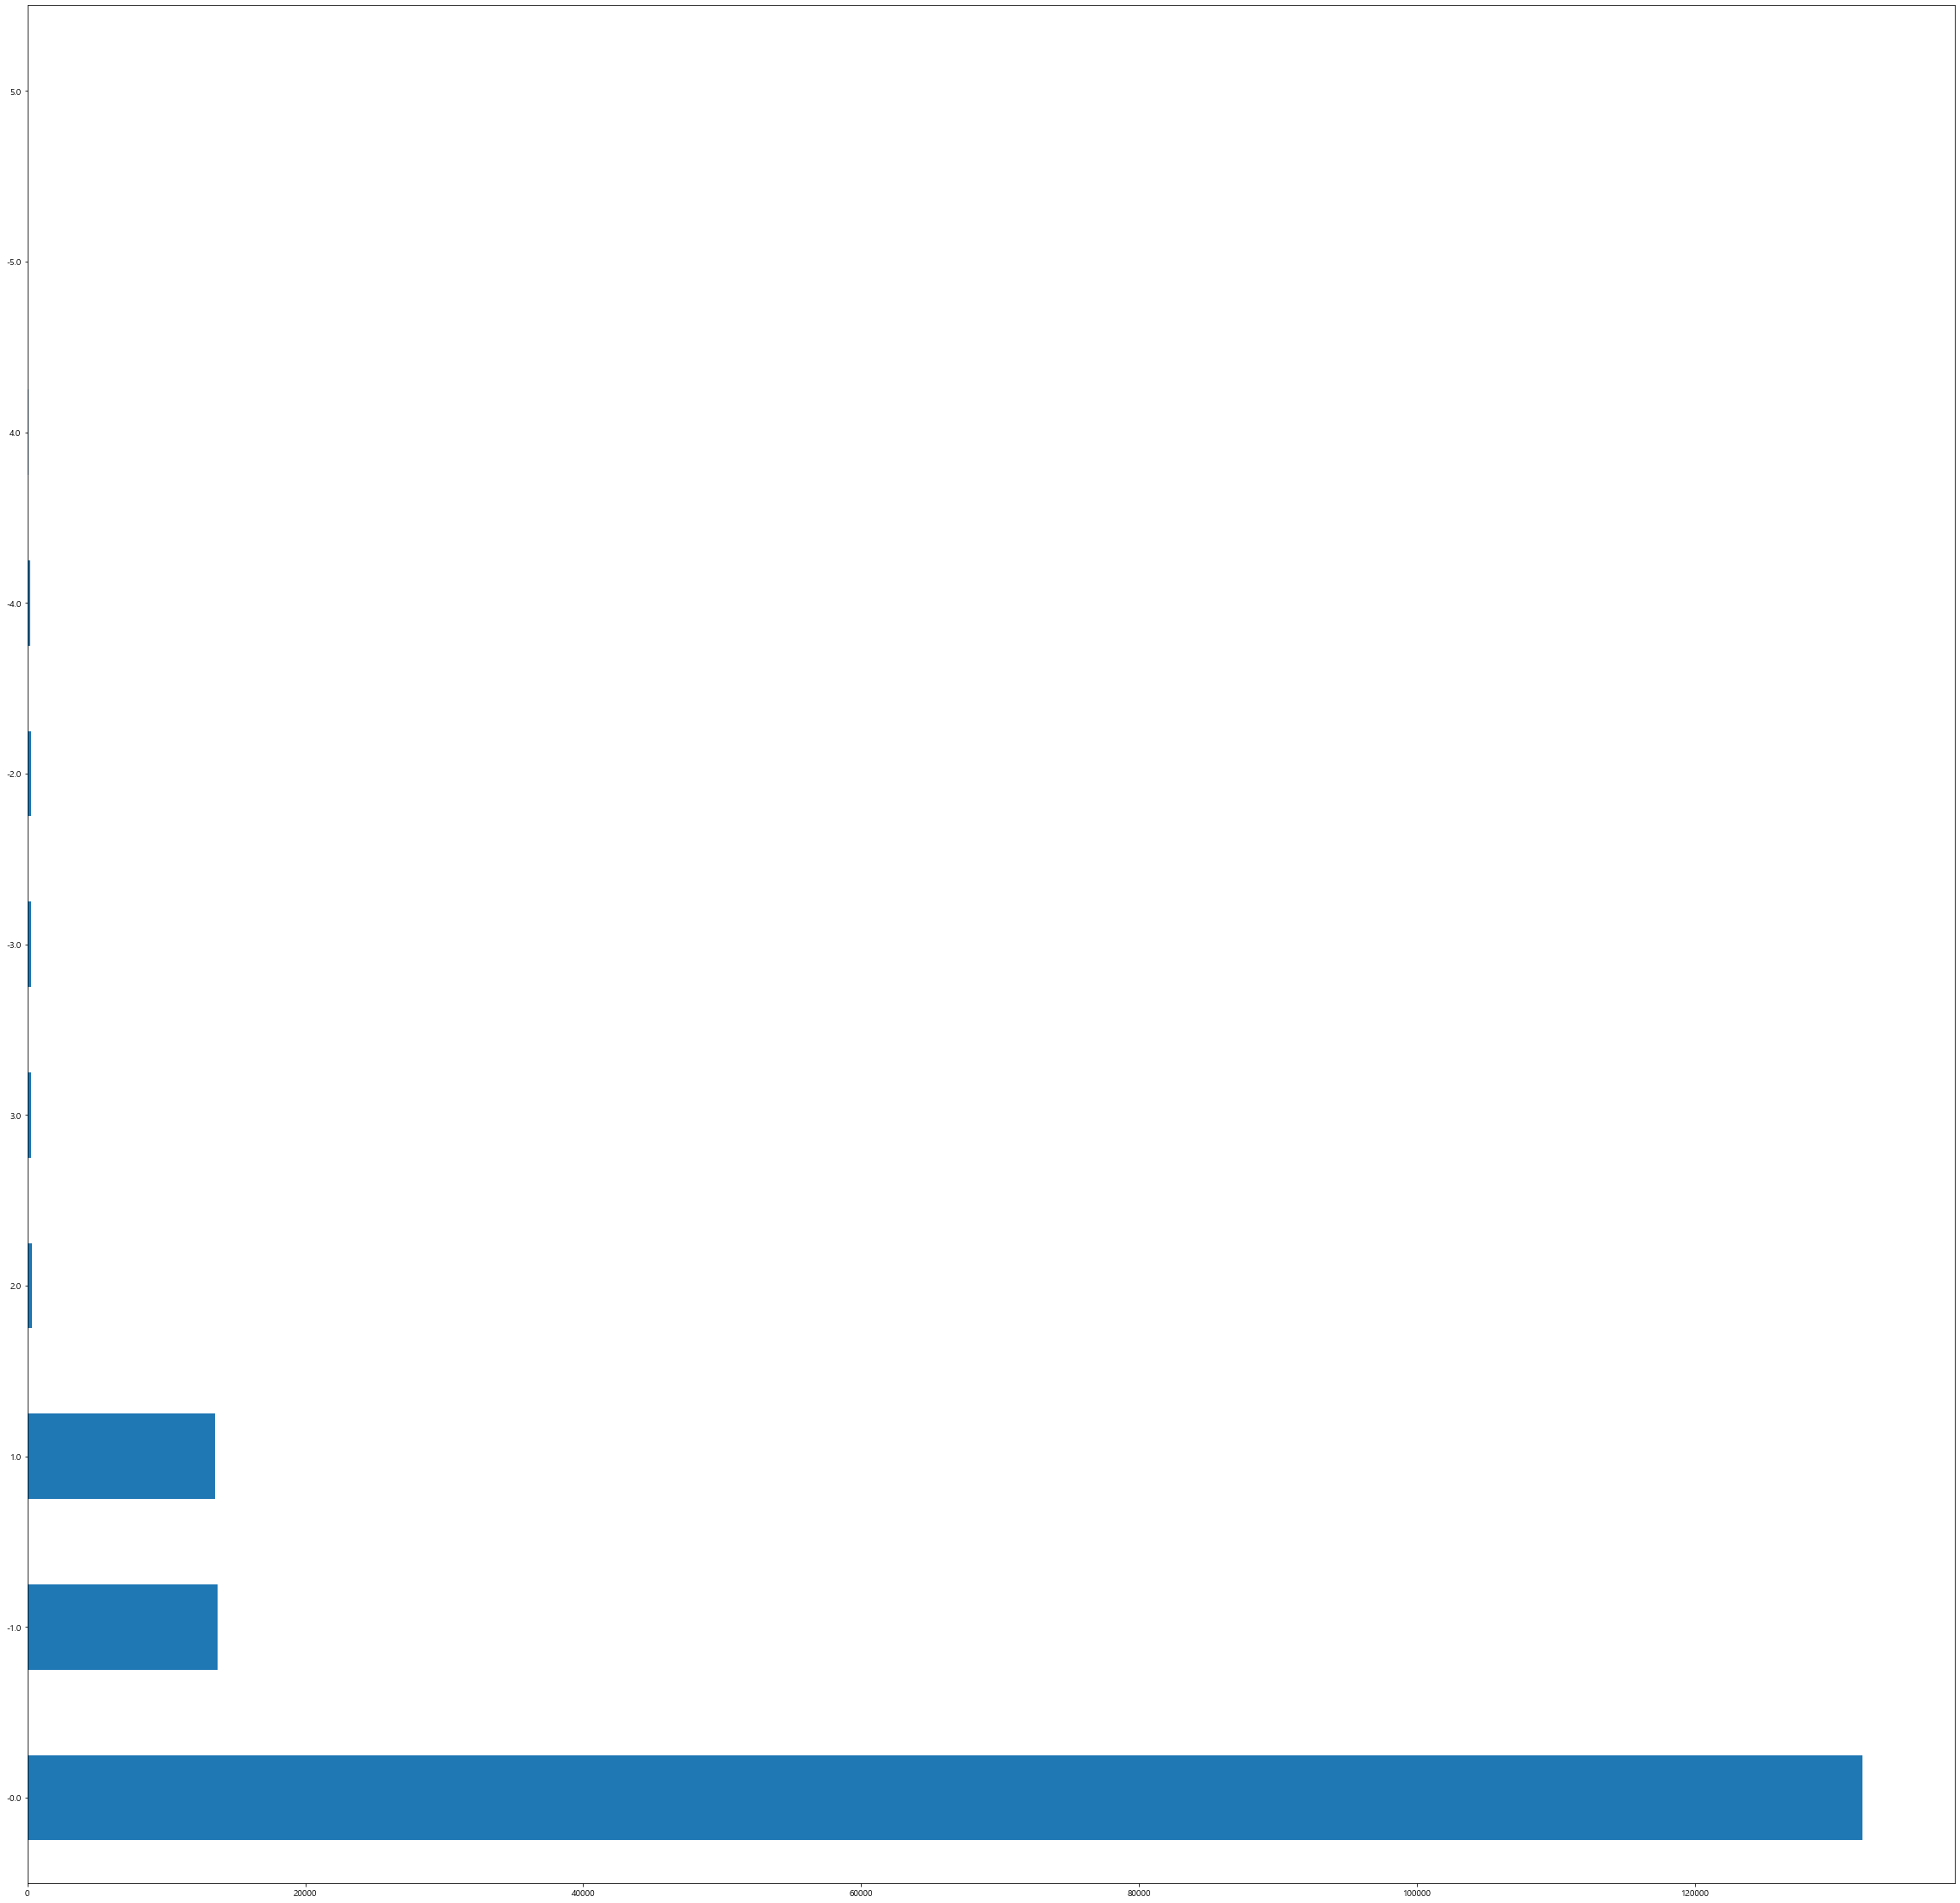

In [271]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [272]:
df_test['diff_int'].value_counts(ascending=False)

-0.0    132082
-1.0     13678
 1.0     13477
 2.0       319
 3.0       269
-3.0       266
-2.0       252
-4.0       199
 4.0        82
-5.0         2
 5.0         2
Name: diff_int, dtype: int64

In [273]:
df_test['예측지수'].round(0).value_counts()

105.0    11240
95.0     10395
96.0      8414
104.0     8084
97.0      7392
103.0     7219
92.0      6877
98.0      6753
102.0     6729
108.0     6607
91.0      6422
94.0      6213
106.0     6148
109.0     6147
101.0     6010
99.0      5950
107.0     5805
93.0      5689
100.0     5448
110.0     3986
90.0      3671
89.0      3143
111.0     3141
88.0      2041
112.0     2009
87.0      1291
113.0     1215
114.0      979
86.0       915
115.0      729
85.0       653
84.0       530
116.0      503
117.0      411
83.0       386
82.0       275
118.0      270
81.0       192
119.0      192
80.0       128
120.0      124
79.0        75
121.0       65
122.0       42
78.0        41
77.0        24
123.0       22
76.0        14
74.0         6
73.0         4
75.0         4
70.0         2
72.0         2
71.0         1
Name: 예측지수, dtype: int64

# 예측 나이 분포

In [274]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [275]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [276]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [277]:
df_plot = pd.DataFrame(y_test.value_counts())

In [278]:
df_plot.columns = ['count']

In [279]:
df_plot.reset_index(inplace=True)

In [280]:
df_plot = df_plot.sort_values('index', ascending=True)

In [281]:
df_plot

,index,count
53,70.0,1
51,71.0,2
52,72.0,2
50,73.0,3
48,74.0,7
49,75.0,5
47,76.0,11
45,77.0,29
44,78.0,37
41,79.0,77


In [282]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

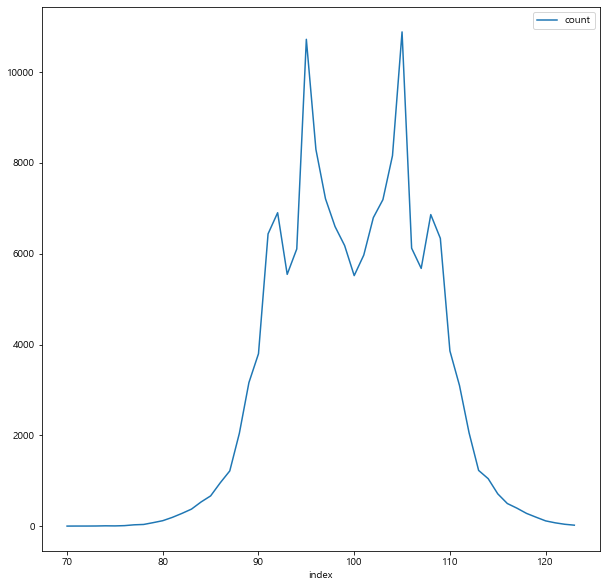

In [283]:
df_plot.plot()

In [284]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [285]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [286]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [287]:
df_plot.columns = ['count']

In [288]:
df_plot.reset_index(inplace=True)

In [289]:
df_plot = df_plot.sort_values(0, ascending=True)

In [290]:
df_plot.set_index(0, inplace=True)

In [291]:
df_plot

,count
0,
70.0,2
71.0,1
72.0,2
73.0,4
74.0,6
75.0,4
76.0,14
77.0,24
78.0,41


<AxesSubplot:xlabel='0'>

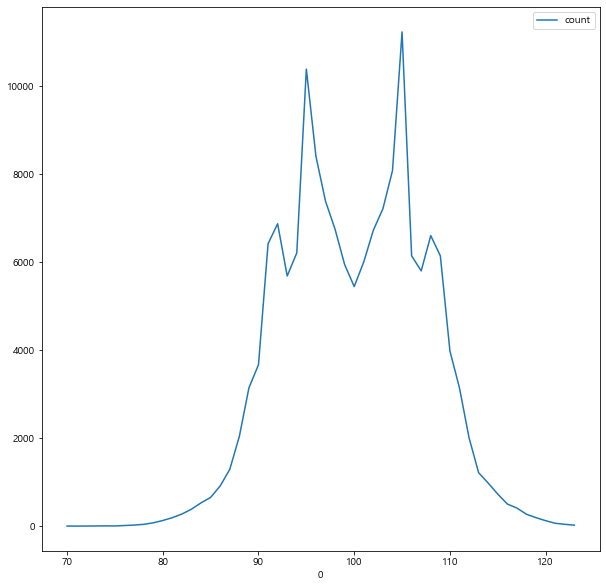

In [292]:
df_plot.plot()

# 시각화

In [293]:
# model.coef_

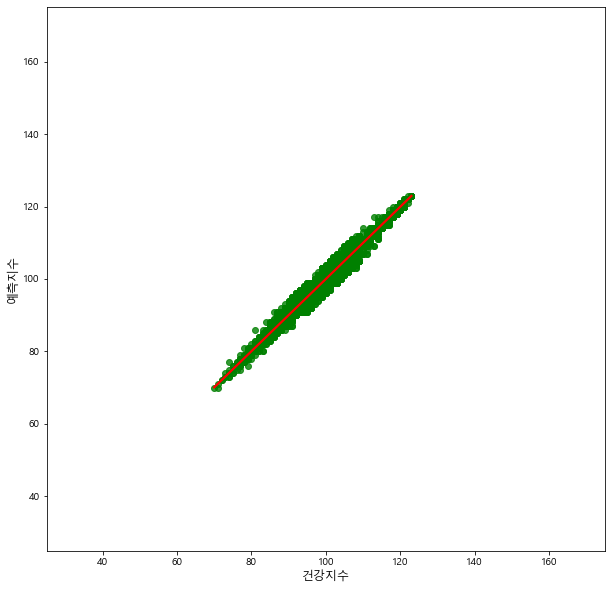

In [294]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [295]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
0,2011,32,11757,1,24,73.0,-0.41,-0.5,0.13,21.74,8.7,2.7,0.36,124.08,100.0,100.00,33.99,5.76,82.27,91.0
1,2019,50,356493,1,53,50.0,-0.41,-0.2,0.13,27.30,8.6,4.0,0.36,124.21,100.0,114.35,43.65,75.56,96.72,98.0
2,2021,50,642497,1,55,53.0,-0.41,-0.2,0.13,25.80,8.8,2.9,0.36,131.37,100.0,125.51,69.66,60.66,102.23,101.0
3,2019,62,421626,1,40,168.0,-0.41,-0.2,0.13,21.74,9.3,3.5,0.36,31.09,100.0,100.00,137.15,150.00,97.68,99.0
4,2020,62,565527,1,41,162.0,-0.41,-0.2,0.13,21.74,8.9,3.6,0.36,22.07,100.0,100.00,80.36,136.56,85.72,93.0


In [296]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556346 entries, 0 to 556345
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   검진년도             556346 non-null  int64  
 1   UID              556346 non-null  int64  
 2   CU_REC_ID        556346 non-null  int64  
 3   SEX              556346 non-null  int64  
 4   검진당시나이           556346 non-null  int64  
 5   ALP              556346 non-null  float64
 6   골밀도검사(BMD)       556346 non-null  float64
 7   골밀도검사(허리)        556346 non-null  float64
 8   골밀도검사 (T-Score)  556346 non-null  float64
 9   비타민D             556346 non-null  float64
 10  Ca(칼슘)           556346 non-null  float64
 11  P(인)             556346 non-null  float64
 12  T-Score          556346 non-null  float64
 13  ALP_kde          556346 non-null  float64
 14  T-Score_kde      556346 non-null  float64
 15  비타민D_kde         556346 non-null  float64
 16  Ca(칼슘)_kde       556346 non-null  floa

In [297]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
86327,2022,168996,2259500,1,35,41.0,-0.41,-0.2,0.13,31.7,9.7,3.9,0.36,79.33,100.0,171.46,135.28,103.32,116.40,108.0
86328,2023,168996,2259499,1,36,50.0,-0.41,-0.2,0.13,18.7,9.6,4.4,0.36,121.95,100.0,101.73,144.24,30.20,101.42,101.0
86329,2024,168996,2281994,1,37,50.0,-0.41,-0.2,0.13,22.3,9.9,4.1,0.36,120.10,100.0,106.56,88.22,65.51,99.10,100.0


In [298]:
train_columns

['검진당시나이', 'ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [299]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [300]:
len(df_pred)

556346

In [301]:
df_pred.reset_index(drop=True, inplace=True)

In [302]:
X_test

,검진당시나이,ALP,T-Score,비타민D,Ca(칼슘),P(인)
355965,33,96.24,0.36,21.74,9.4,3.60
147931,36,162.00,0.36,21.74,9.4,3.52
156680,36,40.00,0.36,21.74,8.6,3.40
116018,55,67.00,0.36,21.74,9.5,2.90
401339,43,220.00,0.36,21.74,9.7,3.30
...,...,...,...,...,...,...
184518,54,157.00,0.36,21.74,8.9,3.30
296423,54,53.00,0.36,43.80,9.7,3.60
64884,50,61.00,0.36,21.00,10.1,3.60
49004,52,51.00,0.36,21.74,10.0,4.00


In [303]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'ALP', '골밀도검사(BMD)',
       '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)', 'T-Score',
       'ALP_kde', 'T-Score_kde', '비타민D_kde', 'Ca(칼슘)_kde', 'P(인)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [304]:
df_pred[train_columns]

,검진당시나이,ALP,T-Score,비타민D,Ca(칼슘),P(인)
0,24,73.0,0.36,21.74,8.7,2.70
1,53,50.0,0.36,27.30,8.6,4.00
2,55,53.0,0.36,25.80,8.8,2.90
3,40,168.0,0.36,21.74,9.3,3.50
4,41,162.0,0.36,21.74,8.9,3.60
...,...,...,...,...,...,...
556341,36,57.0,0.36,21.74,9.4,3.52
556342,65,83.0,0.36,21.74,9.4,3.52
556343,29,58.0,0.36,21.74,9.4,3.52
556344,26,83.0,0.36,14.40,10.0,3.40


In [305]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [306]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [307]:
pred_data = pred_data.round(0)

In [308]:
pred_data

array([ 91.,  98., 102., ..., 105.,  98., 107.], dtype=float32)

In [309]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [310]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [311]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target,예측지수
0,2011,32,11757,1,24,73.00,-0.41,-0.5,0.13,21.74,8.7,2.70,0.36,124.08,100.0,100.00,33.99,5.76,82.27,91.0,91.0
1,2019,50,356493,1,53,50.00,-0.41,-0.2,0.13,27.30,8.6,4.00,0.36,124.21,100.0,114.35,43.65,75.56,96.72,98.0,98.0
2,2021,50,642497,1,55,53.00,-0.41,-0.2,0.13,25.80,8.8,2.90,0.36,131.37,100.0,125.51,69.66,60.66,102.23,101.0,102.0
3,2019,62,421626,1,40,168.00,-0.41,-0.2,0.13,21.74,9.3,3.50,0.36,31.09,100.0,100.00,137.15,150.00,97.68,99.0,99.0
4,2020,62,565527,1,41,162.00,-0.41,-0.2,0.13,21.74,8.9,3.60,0.36,22.07,100.0,100.00,80.36,136.56,85.72,93.0,93.0
5,2021,62,699357,1,42,152.00,-0.41,-0.2,0.13,21.74,8.9,3.50,0.36,19.05,100.0,100.00,78.30,149.82,86.67,93.0,94.0
6,2022,62,1356310,1,43,59.00,-0.41,-0.2,0.13,15.70,9.4,3.52,0.36,147.19,100.0,94.19,100.00,100.00,108.87,104.0,104.0
7,2023,62,2170394,1,44,61.00,-0.41,-0.2,0.13,15.70,9.5,3.40,0.36,149.28,100.0,88.37,149.95,147.35,121.97,111.0,111.0
8,2019,67,410099,1,51,52.00,-0.41,-0.2,0.13,21.74,9.0,3.20,0.36,131.00,100.0,100.00,94.98,132.59,110.58,105.0,106.0
9,2020,67,481109,1,52,53.00,-0.41,-0.2,0.13,21.74,9.2,3.20,0.36,128.88,100.0,100.00,139.60,130.87,116.26,108.0,108.0


## 예측지수 성능평가

In [312]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.19252587418620787

# target으로 나이 계산

In [313]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [314]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,73.00,-0.41,-0.5,0.13,21.74,8.7,2.70,0.36,124.08,100.0,100.00,33.99,5.76,82.27,91.0,91.0,25.8
1,2019,50,356493,1,53,50.00,-0.41,-0.2,0.13,27.30,8.6,4.00,0.36,124.21,100.0,114.35,43.65,75.56,96.72,98.0,98.0,53.4
2,2021,50,642497,1,55,53.00,-0.41,-0.2,0.13,25.80,8.8,2.90,0.36,131.37,100.0,125.51,69.66,60.66,102.23,101.0,102.0,54.6
3,2019,62,421626,1,40,168.00,-0.41,-0.2,0.13,21.74,9.3,3.50,0.36,31.09,100.0,100.00,137.15,150.00,97.68,99.0,99.0,40.2
4,2020,62,565527,1,41,162.00,-0.41,-0.2,0.13,21.74,8.9,3.60,0.36,22.07,100.0,100.00,80.36,136.56,85.72,93.0,93.0,42.4
5,2021,62,699357,1,42,152.00,-0.41,-0.2,0.13,21.74,8.9,3.50,0.36,19.05,100.0,100.00,78.30,149.82,86.67,93.0,94.0,43.2
6,2022,62,1356310,1,43,59.00,-0.41,-0.2,0.13,15.70,9.4,3.52,0.36,147.19,100.0,94.19,100.00,100.00,108.87,104.0,104.0,42.2
7,2023,62,2170394,1,44,61.00,-0.41,-0.2,0.13,15.70,9.5,3.40,0.36,149.28,100.0,88.37,149.95,147.35,121.97,111.0,111.0,41.8
8,2019,67,410099,1,51,52.00,-0.41,-0.2,0.13,21.74,9.0,3.20,0.36,131.00,100.0,100.00,94.98,132.59,110.58,105.0,106.0,49.8
9,2020,67,481109,1,52,53.00,-0.41,-0.2,0.13,21.74,9.2,3.20,0.36,128.88,100.0,100.00,139.60,130.87,116.26,108.0,108.0,50.4


## 예측나이 성능평가

In [315]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

1.171483213683571

# 최종 산출

In [316]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,73.0,-0.41,-0.5,0.13,21.74,8.7,2.7,0.36,124.08,100.0,100.00,33.99,5.76,82.27,91.0,91.0,25.8
1,2019,50,356493,1,53,50.0,-0.41,-0.2,0.13,27.30,8.6,4.0,0.36,124.21,100.0,114.35,43.65,75.56,96.72,98.0,98.0,53.4
2,2021,50,642497,1,55,53.0,-0.41,-0.2,0.13,25.80,8.8,2.9,0.36,131.37,100.0,125.51,69.66,60.66,102.23,101.0,102.0,54.6
3,2019,62,421626,1,40,168.0,-0.41,-0.2,0.13,21.74,9.3,3.5,0.36,31.09,100.0,100.00,137.15,150.00,97.68,99.0,99.0,40.2
4,2020,62,565527,1,41,162.0,-0.41,-0.2,0.13,21.74,8.9,3.6,0.36,22.07,100.0,100.00,80.36,136.56,85.72,93.0,93.0,42.4


# DataMart csv

In [317]:
df_copy = df.copy()

In [318]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)
0,2010,7282,2520,1,42,63.0,NaN,NaN,NaN,NaN,9.0,4.1
1,2010,7490,3638,1,39,164.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,184.0,NaN,NaN,NaN,NaN,9.6,3.5
3,2010,8056,4745,1,42,165.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8457,3929,1,38,147.0,NaN,NaN,NaN,NaN,9.5,2.6


In [319]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1213899 non-null  int64  
 1   UID              1213899 non-null  int64  
 2   CU_REC_ID        1213899 non-null  int64  
 3   SEX              1213899 non-null  int64  
 4   검진당시나이           1213899 non-null  int64  
 5   ALP              1073547 non-null  float64
 6   골밀도검사(BMD)       16652 non-null    float64
 7   골밀도검사(허리)        54723 non-null    float64
 8   골밀도검사 (T-Score)  26941 non-null    float64
 9   비타민D             231397 non-null   float64
 10  Ca(칼슘)           895500 non-null   float64
 11  P(인)             869636 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 111.1 MB


In [320]:
minimums

[-67.0,
 -3.8999999999999995,
 -5.35,
 -2.95,
 -3.914999999999999,
 8.100000000000001,
 2.3999999999999995]

In [321]:
maximums

[253.0, 3.3, 7.049999999999999, 3.05, 46.525, 10.5, 4.8]

In [322]:
train_columns

['검진당시나이', 'ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [323]:
target_cols

['ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

## 변수 생성

In [324]:
df_copy['T-Score'] = df_copy['골밀도검사(BMD)'] + df_copy['골밀도검사(허리)'] + df_copy['골밀도검사 (T-Score)']

In [325]:
df_copy['T-Score'] = df_copy['T-Score'].round(2)

In [326]:
df_copy.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'ALP', '골밀도검사(BMD)',
       '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)', 'T-Score'],
      dtype='object')

In [327]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score
0,2010,7282,2520,1,42,63.0,NaN,NaN,NaN,NaN,9.0,4.1,NaN
1,2010,7490,3638,1,39,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,184.0,NaN,NaN,NaN,NaN,9.6,3.5,NaN
3,2010,8056,4745,1,42,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8457,3929,1,38,147.0,NaN,NaN,NaN,NaN,9.5,2.6,NaN


In [328]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [329]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [330]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score
0,2010,7282,2520,1,42,63.0,NaN,NaN,NaN,NaN,3.05,4.1,NaN
1,2010,7490,3638,1,39,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,184.0,NaN,NaN,NaN,NaN,3.05,3.5,NaN
3,2010,8056,4745,1,42,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8457,3929,1,38,147.0,NaN,NaN,NaN,NaN,3.05,2.6,NaN


## 검진 항목 all 결측치 지우기

In [331]:
target_cols

['ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [332]:
df_man_csv.dropna(subset=target_cols, how='all', inplace=True)

In [333]:
df_man_csv.reset_index(drop=True, inplace=True)

In [334]:
len(df_man_csv)

702899

## fillna

In [335]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## ALP 스크리닝

In [336]:
screening = 30

In [337]:
scr_col = 'ALP'

In [338]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score
510,2010,617164,2000,1,37,1.2,-0.41,-0.2,0.13,21.73,3.05,4.40,0.36
1291,2011,605943,7055,1,43,25.0,-0.41,-0.2,0.13,21.73,3.05,3.30,0.36
1341,2011,617643,5180,1,38,20.0,-0.41,-0.2,0.13,21.73,3.05,3.52,0.36
1662,2015,488271,79775,1,44,29.0,-0.41,-0.2,0.13,21.73,3.05,4.40,0.36
1716,2016,632956,110059,1,37,27.0,-0.41,-0.2,0.13,21.73,3.05,2.50,0.36


In [339]:
len(df_man_csv[df_man_csv[scr_col] < screening])

2519

In [340]:
df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [341]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score


In [342]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

In [343]:
len(df_man_csv)

702899

## 비타민 D 스크리닝

In [344]:
screening = 100

In [345]:
scr_col = '비타민D'

In [346]:
df_man_csv[df_man_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score


In [347]:
len(df_man_csv[df_man_csv[scr_col] > screening])

0

In [348]:
df_man_csv.loc[df_man_csv[scr_col] > screening, scr_col] = screening

In [349]:
df_man_csv[df_man_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score


In [350]:
len(df_man_csv[df_man_csv[scr_col] > screening])

0

## 모델 예측

In [351]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [352]:
pred_data = pred_data.round(0)

In [353]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [354]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수
0,2010,7282,2520,1,42,63.0,-0.41,-0.2,0.13,21.73,3.05,4.10,0.36,97.0
1,2010,7490,3638,1,39,164.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,93.0
2,2010,7915,3997,1,36,184.0,-0.41,-0.2,0.13,21.73,3.05,3.50,0.36,92.0
3,2010,8056,4745,1,42,165.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,93.0
4,2010,8457,3929,1,38,147.0,-0.41,-0.2,0.13,21.73,3.05,2.60,0.36,82.0


### 성능 평가

In [355]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [356]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [357]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [358]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 1.6946494446570561


In [359]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9432959678295827

In [360]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
0,2010,7282,2520,1,42,63.0,-0.41,-0.2,0.13,21.73,3.05,4.10,0.36,97.0,42.6
1,2010,7490,3638,1,39,164.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,93.0,40.4
2,2010,7915,3997,1,36,184.0,-0.41,-0.2,0.13,21.73,3.05,3.50,0.36,92.0,37.6
3,2010,8056,4745,1,42,165.0,-0.41,-0.2,0.13,21.73,9.40,3.52,0.36,93.0,43.4
4,2010,8457,3929,1,38,147.0,-0.41,-0.2,0.13,21.73,3.05,2.60,0.36,82.0,41.6


In [361]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702899 entries, 0 to 702898
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   검진년도             702899 non-null  int64  
 1   UID              702899 non-null  int64  
 2   CU_REC_ID        702899 non-null  int64  
 3   SEX              702899 non-null  int64  
 4   검진당시나이           702899 non-null  int64  
 5   ALP              702899 non-null  float64
 6   골밀도검사(BMD)       702899 non-null  float64
 7   골밀도검사(허리)        702899 non-null  float64
 8   골밀도검사 (T-Score)  702899 non-null  float64
 9   비타민D             702899 non-null  float64
 10  Ca(칼슘)           702899 non-null  float64
 11  P(인)             702899 non-null  float64
 12  T-Score          702899 non-null  float64
 13  예측지수             702899 non-null  float32
 14  예측나이             702899 non-null  float64
dtypes: float32(1), float64(9), int64(5)
memory usage: 77.8 MB


# 최종 UID별 확인

In [362]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
252227,2022,175673,751348,1,48,50.0,-0.41,-0.2,0.13,21.73,3.05,3.3,0.36,99.0,48.2
252228,2022,175673,1463838,1,48,50.0,-0.41,-0.2,0.13,21.73,3.05,3.3,0.36,99.0,48.2
252164,2022,175673,1919125,1,48,50.0,-0.41,-0.2,0.13,21.73,3.05,3.3,0.36,99.0,48.2
252229,2022,175673,2169120,1,48,50.0,-0.41,-0.2,0.13,21.73,3.05,3.3,0.36,99.0,48.2
252165,2022,175673,2223795,1,48,50.0,-0.41,-0.2,0.13,21.73,3.05,3.3,0.36,99.0,48.2
252166,2022,175673,2237465,1,48,50.0,-0.41,-0.2,0.13,21.73,3.05,3.3,0.36,99.0,48.2
252230,2022,175673,2238320,1,48,50.0,-0.41,-0.2,0.13,21.73,3.05,3.3,0.36,99.0,48.2
252231,2022,175673,2246042,1,48,50.0,-0.41,-0.2,0.13,21.73,3.05,3.3,0.36,99.0,48.2
411920,2023,175673,1463893,1,49,56.0,-0.41,-0.2,0.13,7.05,3.05,3.8,0.36,91.0,50.8
411916,2023,175673,1919126,1,49,56.0,-0.41,-0.2,0.13,7.05,3.05,3.8,0.36,91.0,50.8


In [363]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
179111,2021,289587,796178,1,47,63.0,-0.41,-0.2,0.13,7.05,3.05,3.7,0.36,92.0,48.6
283252,2022,289587,866076,1,48,76.0,-0.41,-0.2,0.13,21.73,3.05,3.4,0.36,99.0,48.2
283207,2022,289587,2115999,1,48,76.0,-0.41,-0.2,0.13,21.73,3.05,3.4,0.36,99.0,48.2
87825,2022,289587,2603574,1,48,76.0,-0.41,-0.2,0.13,21.73,3.05,3.4,0.36,99.0,48.2
460668,2023,289587,1487447,1,49,65.0,-0.41,-0.2,0.13,7.05,3.05,4.3,0.36,85.0,52.0
460669,2023,289587,2227964,1,49,65.0,-0.41,-0.2,0.13,7.05,3.05,4.3,0.36,85.0,52.0
639595,2024,289587,2243723,1,50,80.0,-0.41,-0.2,0.13,7.05,3.05,3.8,0.36,84.0,53.2
639573,2024,289587,2603575,1,50,80.0,-0.41,-0.2,0.13,7.05,3.05,3.8,0.36,84.0,53.2


In [364]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
382303,2022,897603,1066133,1,51,64.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,52.2
382313,2022,897603,1068885,1,51,64.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,52.2
382314,2022,897603,1728532,1,51,64.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,52.2
382315,2022,897603,2555144,1,51,64.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,52.2
551269,2023,897603,1458387,1,52,58.0,-0.41,-0.2,0.13,7.05,3.05,2.9,0.36,88.0,54.4
551270,2023,897603,1728531,1,52,58.0,-0.41,-0.2,0.13,7.05,3.05,2.9,0.36,88.0,54.4
539997,2023,897603,2120063,1,52,58.0,-0.41,-0.2,0.13,7.05,3.05,2.9,0.36,88.0,54.4
539998,2023,897603,2351665,1,52,58.0,-0.41,-0.2,0.13,7.05,3.05,2.9,0.36,88.0,54.4
551271,2023,897603,2555143,1,52,58.0,-0.41,-0.2,0.13,7.05,3.05,2.9,0.36,88.0,54.4
539999,2023,897603,2622260,1,52,58.0,-0.41,-0.2,0.13,7.05,3.05,2.9,0.36,88.0,54.4


In [365]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
236805,2022,119172,751336,1,41,49.0,-0.41,-0.2,0.13,7.05,3.05,2.6,0.36,83.0,44.4
236806,2022,119172,1432355,1,41,49.0,-0.41,-0.2,0.13,7.05,3.05,2.6,0.36,83.0,44.4
236803,2022,119172,1432476,1,41,49.0,-0.41,-0.2,0.13,7.05,3.05,2.6,0.36,83.0,44.4
236807,2022,119172,2247083,1,41,49.0,-0.41,-0.2,0.13,7.05,3.05,2.6,0.36,83.0,44.4
236808,2022,119172,2252956,1,41,49.0,-0.41,-0.2,0.13,7.05,3.05,2.6,0.36,83.0,44.4
397930,2023,119172,1436742,1,42,51.0,-0.41,-0.2,0.13,7.05,3.05,3.1,0.36,88.0,44.4
397931,2023,119172,2247082,1,42,51.0,-0.41,-0.2,0.13,7.05,3.05,3.1,0.36,88.0,44.4
397932,2023,119172,2252955,1,42,51.0,-0.41,-0.2,0.13,7.05,3.05,3.1,0.36,88.0,44.4
621275,2024,119172,2250063,1,43,57.0,-0.41,-0.2,0.13,7.05,3.05,3.0,0.36,88.0,45.4
621276,2024,119172,2252954,1,43,57.0,-0.41,-0.2,0.13,7.05,3.05,3.0,0.36,88.0,45.4


In [366]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
551264,2023,897595,1525045,1,40,46.0,-0.41,-0.2,0.13,7.05,3.05,3.1,0.36,87.0,42.6
551265,2023,897595,1593851,1,40,46.0,-0.41,-0.2,0.13,7.05,3.05,3.1,0.36,87.0,42.6
551262,2023,897595,2005289,1,40,46.0,-0.41,-0.2,0.13,7.05,3.05,3.1,0.36,87.0,42.6
551263,2023,897595,2138998,1,40,46.0,-0.41,-0.2,0.13,7.05,3.05,3.1,0.36,87.0,42.6
535713,2023,897595,2320478,1,40,46.0,-0.41,-0.2,0.13,7.05,3.05,3.1,0.36,87.0,42.6
551266,2023,897595,2328772,1,40,46.0,-0.41,-0.2,0.13,7.05,3.05,3.1,0.36,87.0,42.6
681335,2024,897595,2329051,1,41,45.0,-0.41,-0.2,0.13,7.05,3.05,3.6,0.36,87.0,43.6


In [367]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
331485,2022,492764,909688,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2
331486,2022,492764,1575802,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2
331489,2022,492764,1668547,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2
331487,2022,492764,2246777,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2
331488,2022,492764,2330256,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2
132572,2022,492764,2343199,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2
149753,2022,492764,2363393,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2
149754,2022,492764,2639564,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2
149755,2022,492764,2703924,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2
331490,2022,492764,2783328,1,39,58.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,94.0,40.2


In [368]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
555429,2023,933936,1431742,1,40,43.0,-0.41,-0.2,0.13,7.05,3.05,3.7,0.36,86.0,42.8
555430,2023,933936,1435266,1,40,43.0,-0.41,-0.2,0.13,7.05,3.05,3.7,0.36,86.0,42.8
682625,2024,933936,2242997,1,41,45.0,-0.41,-0.2,0.13,7.05,3.05,3.4,0.36,88.0,43.4


In [369]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
249782,2022,168996,919754,1,35,41.0,-0.41,-0.2,0.13,7.05,3.05,3.9,0.36,82.0,38.6
249783,2022,168996,1425925,1,35,41.0,-0.41,-0.2,0.13,7.05,3.05,3.9,0.36,82.0,38.6
249784,2022,168996,2259500,1,35,41.0,-0.41,-0.2,0.13,7.05,3.05,3.9,0.36,82.0,38.6
409684,2023,168996,1425970,1,36,50.0,-0.41,-0.2,0.13,7.05,3.05,4.4,0.36,81.0,39.8
409685,2023,168996,1475832,1,36,50.0,-0.41,-0.2,0.13,7.05,3.05,4.4,0.36,81.0,39.8
409686,2023,168996,2259499,1,36,50.0,-0.41,-0.2,0.13,7.05,3.05,4.4,0.36,81.0,39.8
626468,2024,168996,2281994,1,37,50.0,-0.41,-0.2,0.13,7.05,3.05,4.1,0.36,84.0,40.2


# 여성 모델

In [370]:
df_target['SEX'].value_counts()

1    722875
2    429810
Name: SEX, dtype: int64

In [371]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

429810

# 결측치 처리

## 결측치 삭제

In [372]:
# df_woman.dropna(inplace=True)

In [373]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
764538,2010,710490,213,2,28,45.0,NaN,NaN,NaN,NaN,9.5,NaN,NaN,147.73,100.0,100.0,124.43,100.0,113.72,107.0
726265,2010,315847,230,2,23,50.0,NaN,NaN,NaN,NaN,9.6,NaN,NaN,149.06,100.0,100.0,135.14,100.0,115.53,108.0
728598,2010,719072,231,2,24,57.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,137.00,100.0,100.0,46.91,100.0,100.34,100.0
987978,2010,552037,332,2,41,46.0,NaN,NaN,NaN,NaN,8.8,3.7,NaN,147.21,100.0,100.0,99.98,138.5,115.61,108.0
764539,2010,710522,632,2,28,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.39,100.0,100.0,100.00,100.0,84.44,92.0


## 결측치 평균으로 대체

In [374]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [375]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [376]:
target_cols

['ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [377]:
len(df_woman)

429810

In [378]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [379]:
len(df_woman)

387997

In [380]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
764538,2010,710490,213,2,28,45.0,NaN,NaN,NaN,NaN,9.5,NaN,NaN,147.73,100.0,100.0,124.43,100.0,113.72,107.0
726265,2010,315847,230,2,23,50.0,NaN,NaN,NaN,NaN,9.6,NaN,NaN,149.06,100.0,100.0,135.14,100.0,115.53,108.0
728598,2010,719072,231,2,24,57.0,NaN,NaN,NaN,NaN,10.0,NaN,NaN,137.00,100.0,100.0,46.91,100.0,100.34,100.0
987978,2010,552037,332,2,41,46.0,NaN,NaN,NaN,NaN,8.8,3.7,NaN,147.21,100.0,100.0,99.98,138.5,115.61,108.0
764539,2010,710522,632,2,28,147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.39,100.0,100.0,100.00,100.0,84.44,92.0


In [381]:
len(df_woman)

387997

## fillna

In [382]:
df_woman.mean().round(2)

검진년도                  2021.94
UID                 488019.39
CU_REC_ID          1459957.98
SEX                      2.00
검진당시나이                  38.54
ALP                     82.05
골밀도검사(BMD)              -0.54
골밀도검사(허리)               -0.15
골밀도검사 (T-Score)          0.23
비타민D                    20.89
Ca(칼슘)                   9.23
P(인)                     3.70
T-Score                 -1.33
ALP_kde                 91.84
T-Score_kde            100.00
비타민D_kde               102.65
Ca(칼슘)_kde             106.08
P(인)_kde               106.07
kde_mean               100.56
target                 100.27
dtype: float64

In [383]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [384]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [385]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [386]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [387]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
764538,2010,710490,213,2,28,45.0,-0.54,-0.15,0.23,20.89,9.50,3.7,-1.33,147.73,100.0,100.0,124.43,100.0,113.72,107.0
726265,2010,315847,230,2,23,50.0,-0.54,-0.15,0.23,20.89,9.60,3.7,-1.33,149.06,100.0,100.0,135.14,100.0,115.53,108.0
728598,2010,719072,231,2,24,57.0,-0.54,-0.15,0.23,20.89,10.00,3.7,-1.33,137.00,100.0,100.0,46.91,100.0,100.34,100.0
987978,2010,552037,332,2,41,46.0,-0.54,-0.15,0.23,20.89,8.80,3.7,-1.33,147.21,100.0,100.0,99.98,138.5,115.61,108.0
764539,2010,710522,632,2,28,147.0,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,27.39,100.0,100.0,100.00,100.0,84.44,92.0


# 중복 제거

In [388]:
len(df_woman)

387997

In [389]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [390]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
743878,2021,53,2632765,2,26,47.00,-0.54,-0.15,0.23,20.89,9.20,3.7,-1.33,150.00,100.0,100.00,150.00,137.30,123.19,112.0
743877,2021,53,664316,2,26,47.00,-0.54,-0.15,0.23,20.89,9.20,3.7,-1.33,150.00,100.0,100.00,150.00,137.30,123.19,112.0
769792,2023,53,2632764,2,28,82.05,-0.54,-0.15,0.23,20.80,9.23,3.7,-1.33,100.00,100.0,130.89,100.00,100.00,106.62,103.0
792805,2024,53,2658222,2,29,51.00,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,144.56,100.0,100.00,100.00,100.00,109.55,105.0
796735,2020,54,497669,2,30,84.00,-0.54,-0.15,0.23,16.18,9.60,3.4,-1.33,23.61,100.0,102.56,119.70,94.86,86.26,93.0
834412,2022,54,1319859,2,32,244.00,-0.54,-0.15,0.23,33.30,8.40,3.9,-1.33,2.27,100.0,162.93,31.28,136.85,87.99,94.0
853908,2023,54,2039511,2,33,207.00,-0.54,-0.15,0.23,20.89,8.90,3.7,-1.33,9.15,100.0,100.00,109.41,150.00,89.02,95.0
876189,2024,54,2750990,2,34,69.00,-0.54,-0.15,0.23,18.72,9.70,4.2,-1.33,74.22,100.0,106.61,82.80,71.58,89.38,95.0
850838,2022,56,1351361,2,33,30.00,-0.54,-0.15,0.23,20.89,9.40,4.0,-1.33,74.54,100.0,100.00,142.38,126.04,104.32,102.0
850837,2022,56,1019732,2,33,30.00,-0.54,-0.15,0.23,20.89,9.40,4.0,-1.33,74.54,100.0,100.00,142.38,126.04,104.32,102.0


## first만 남겨두고 중복 제거

In [391]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [392]:
df_woman.reset_index(drop=True, inplace=True)

In [393]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
0,2021,53,2632765,2,26,47.00,-0.54,-0.15,0.23,20.89,9.20,3.7,-1.33,150.00,100.0,100.00,150.00,137.30,123.19,112.0
1,2023,53,2632764,2,28,82.05,-0.54,-0.15,0.23,20.80,9.23,3.7,-1.33,100.00,100.0,130.89,100.00,100.00,106.62,103.0
2,2024,53,2658222,2,29,51.00,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,144.56,100.0,100.00,100.00,100.00,109.55,105.0
3,2020,54,497669,2,30,84.00,-0.54,-0.15,0.23,16.18,9.60,3.4,-1.33,23.61,100.0,102.56,119.70,94.86,86.26,93.0
4,2022,54,1319859,2,32,244.00,-0.54,-0.15,0.23,33.30,8.40,3.9,-1.33,2.27,100.0,162.93,31.28,136.85,87.99,94.0
5,2023,54,2039511,2,33,207.00,-0.54,-0.15,0.23,20.89,8.90,3.7,-1.33,9.15,100.0,100.00,109.41,150.00,89.02,95.0
6,2024,54,2750990,2,34,69.00,-0.54,-0.15,0.23,18.72,9.70,4.2,-1.33,74.22,100.0,106.61,82.80,71.58,89.38,95.0
7,2022,56,1351361,2,33,30.00,-0.54,-0.15,0.23,20.89,9.40,4.0,-1.33,74.54,100.0,100.00,142.38,126.04,104.32,102.0
8,2023,56,2032999,2,34,40.00,-0.54,-0.15,0.23,20.89,8.80,4.2,-1.33,131.56,100.0,100.00,101.37,71.58,102.90,101.0
9,2021,59,701026,2,29,43.00,-0.54,-0.15,0.23,20.89,9.40,4.5,-1.33,145.37,100.0,100.00,149.24,51.55,109.84,105.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

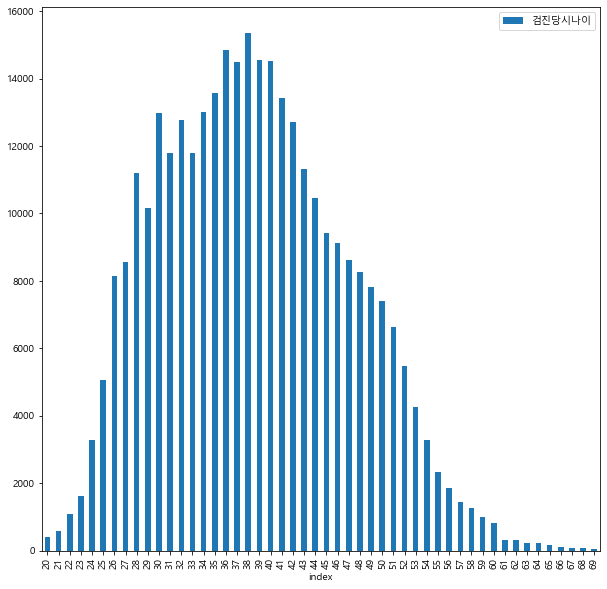

In [394]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [395]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,403
39,21,567
36,22,1079
33,23,1623
30,24,3272
27,25,5050
22,26,8137
20,27,8544
14,28,11193
16,29,10171


# 검진항목 시각화

In [396]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
count,328234.000000,3.282340e+05,3.282340e+05,328234.0,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000,328234.000000
mean,2021.881414,4.818054e+05,1.447355e+06,2.0,38.573149,83.262505,-0.540236,-0.150167,0.229911,20.887584,9.229086,3.700660,-1.329975,90.628321,100.002121,102.526967,106.010214,105.991589,100.248411,100.119165
std,1.581150,3.582390e+05,8.186786e+05,0.0,8.341206,50.237601,0.140978,0.233236,0.148200,3.959572,0.386458,0.377899,0.059400,51.749624,0.587642,16.600635,35.866041,35.833494,14.019888,7.012541
min,2010.000000,5.300000e+01,2.130000e+02,2.0,20.000000,30.000000,-3.840000,-4.000000,-2.900000,0.000000,8.110000,2.400000,-7.300000,0.260000,0.000000,0.250000,0.660000,0.110000,40.370000,70.000000
25%,2021.000000,2.143590e+05,6.210300e+05,2.0,32.000000,47.000000,-0.540000,-0.150000,0.230000,20.890000,9.000000,3.500000,-1.330000,29.200000,100.000000,100.000000,93.810000,95.320000,89.042500,95.000000
50%,2022.000000,3.641720e+05,1.361558e+06,2.0,38.000000,61.000000,-0.540000,-0.150000,0.230000,20.890000,9.230000,3.700000,-1.330000,103.870000,100.000000,100.000000,103.160000,100.000000,101.700000,101.000000
75%,2023.000000,8.000858e+05,2.155546e+06,2.0,44.000000,114.000000,-0.540000,-0.150000,0.230000,20.890000,9.400000,3.900000,-1.330000,140.790000,100.000000,100.000000,138.280000,137.870000,110.660000,105.000000
max,2024.000000,1.473590e+06,2.871326e+06,2.0,69.000000,253.000000,3.300000,5.870000,3.000000,46.520000,10.500000,4.800000,7.200000,150.060000,200.000000,199.810000,151.820000,150.560000,148.960000,124.000000


<AxesSubplot:xlabel='검진당시나이'>

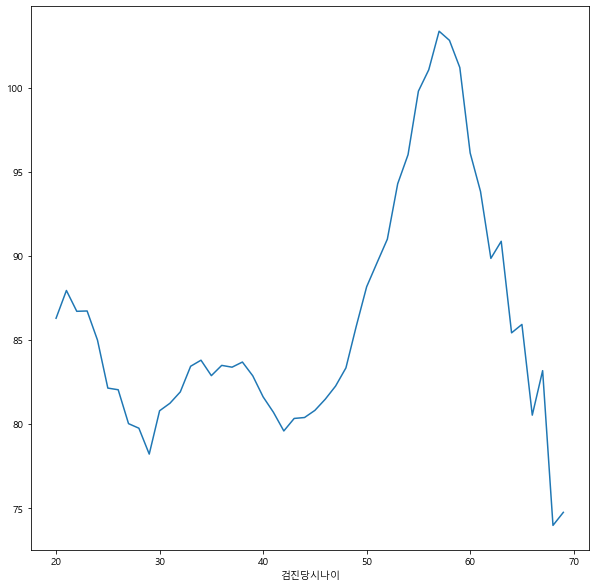

In [397]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

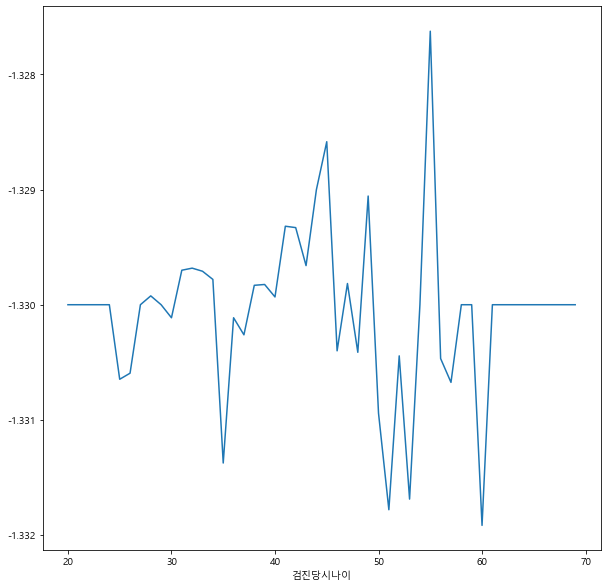

In [398]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

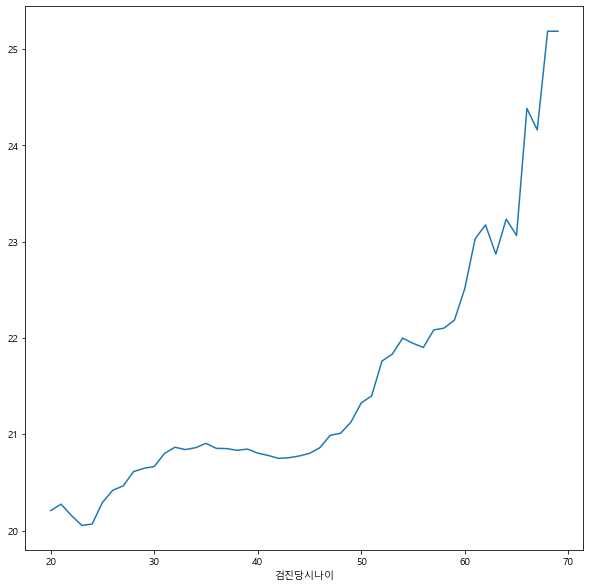

In [399]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

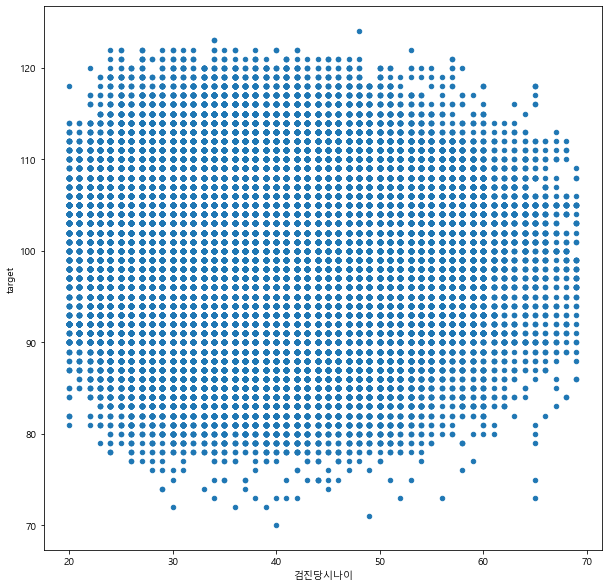

In [400]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

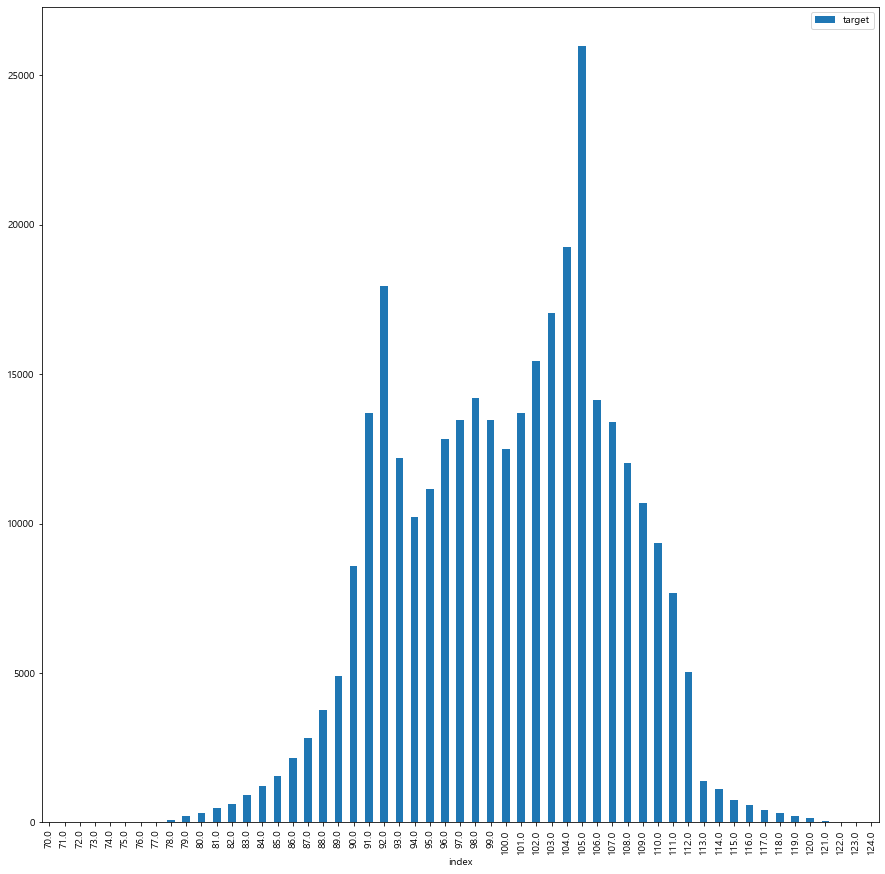

In [401]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [402]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
52,70.0,1
53,71.0,1
50,72.0,3
48,73.0,8
49,74.0,5
46,75.0,17
47,76.0,11
44,77.0,30
42,78.0,96
39,79.0,203


In [403]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [404]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

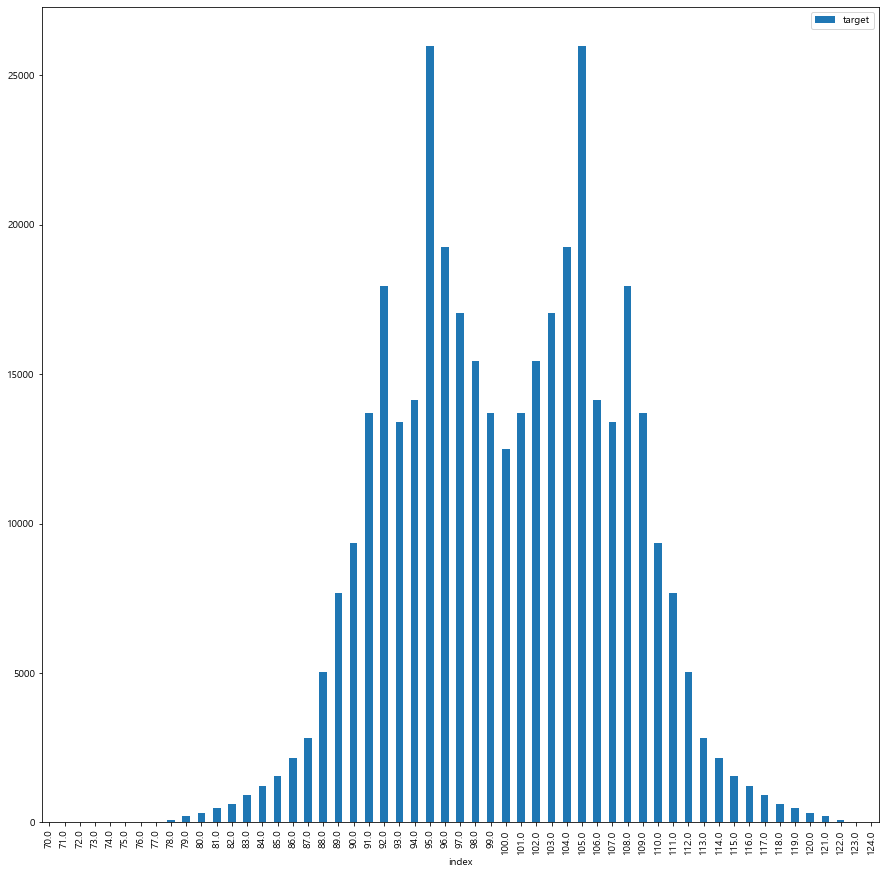

In [405]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [406]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
54,70.0,1
53,71.0,1
52,72.0,3
50,73.0,8
51,74.0,5
47,75.0,17
49,76.0,11
46,77.0,30
44,78.0,96
42,79.0,203


# 나이별 확인하기

In [407]:
# df_woman['검진당시나이'].value_counts()

In [408]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [409]:
# df_woman['검진당시나이'].min()

In [410]:
# df_woman['검진당시나이'].max()

In [411]:
# df_woman.columns

In [412]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [413]:
# df_temp.info()

In [414]:
# df_temp.reset_index(drop=True, inplace=True)

In [415]:
# df_woman = df_temp.copy()

In [416]:
# df_woman['검진당시나이'].value_counts()

In [417]:
# df_woman[df_woman['검진당시나이']==20]

In [418]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [419]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [420]:
train_columns

['검진당시나이', 'ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [421]:
# target_col = '검진당시나이'

In [422]:
target_col

'target'

## Min Max Scaling

In [423]:
from sklearn.preprocessing import MinMaxScaler

In [424]:
scaling_bool

False

In [425]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [426]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [427]:
# model2 = LinearRegression()

In [428]:
# model2.fit(X_train2, y_train2)

In [429]:
# model2.intercept_

In [430]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [431]:
model2 = XGBRegressor()

In [432]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [433]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [434]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 1415.67 seconds for 10 candidates parameter settings.


In [435]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [436]:
# best score
random_search.best_score_

-0.36916619828705566

In [437]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [438]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [439]:
# model = build_model()

In [440]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [441]:
# model.summary()

In [442]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [443]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [444]:
# plot_history(history)

## pyTorch 신경망

In [445]:
np.shape(X_train)[1]

6

In [446]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [447]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [448]:
# epochs = 1000

In [449]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [450]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [451]:
# plt.plot(losses)

## coef 계산

In [452]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [453]:
# df_coef2.columns = ['검사항목', 'coef']

In [454]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [455]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [456]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [457]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [458]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [459]:
# slr2 = LinearRegression()

In [460]:
# slr2.fit(X_train2_poly, y_train2)

In [461]:
# np.shape(X_train2)

In [462]:
# np.shape(X_train2_poly)

In [463]:
# np.shape(X_test2)

In [464]:
# np.shape(X_test2_poly)

In [465]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [466]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [467]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [468]:
import pickle
with open(model_path_woman, 'wb') as f:
    pickle.dump(model2, f)

In [469]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [470]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [471]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [472]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.41001195574565563
MSE : 0.3667024918532257
RMSE : 0.6055596517711741


In [473]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.992856535485417

In [474]:
model2.score(X_test2, y_test2)

0.992856535485417

## feature importance

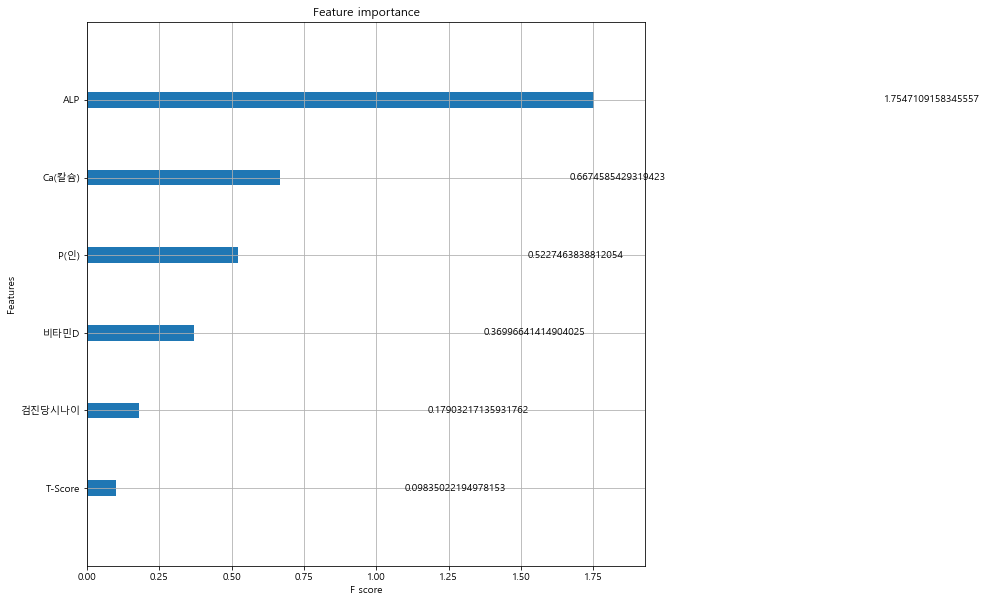

In [475]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [476]:
model2.feature_importances_

array([0.04983825, 0.48846927, 0.02737833, 0.10298974, 0.18580438,
       0.14552   ], dtype=float32)

In [477]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [478]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,ALP,0.488469
4,Ca(칼슘),0.185804
5,P(인),0.145520
3,비타민D,0.102990
0,검진당시나이,0.049838
2,T-Score,0.027378


# 실제나이 - 예측나이 결과

In [479]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [480]:
df_test2.head()

,target,0
0,95.0,94.869583
1,110.0,110.566216
2,101.0,100.772926
3,96.0,96.156548
4,105.0,105.077721


In [481]:
df_test2.columns

Index(['target', 0], dtype='object')

In [482]:
df_test2.columns = ['실제지수', '예측지수']

In [483]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [484]:
df_test2.head()

,실제지수,예측지수,diff
0,95.0,94.869583,-0.130417
1,110.0,110.566216,0.566216
2,101.0,100.772926,-0.227074
3,96.0,96.156548,0.156548
4,105.0,105.077721,0.077721


In [485]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [486]:
len(df_test2)

94701

In [487]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,95.0,94.869583,-0.130417,-0.0
1,110.0,110.566216,0.566216,1.0
2,101.0,100.772926,-0.227074,-0.0
3,96.0,96.156548,0.156548,0.0
4,105.0,105.077721,0.077721,0.0


<AxesSubplot:>

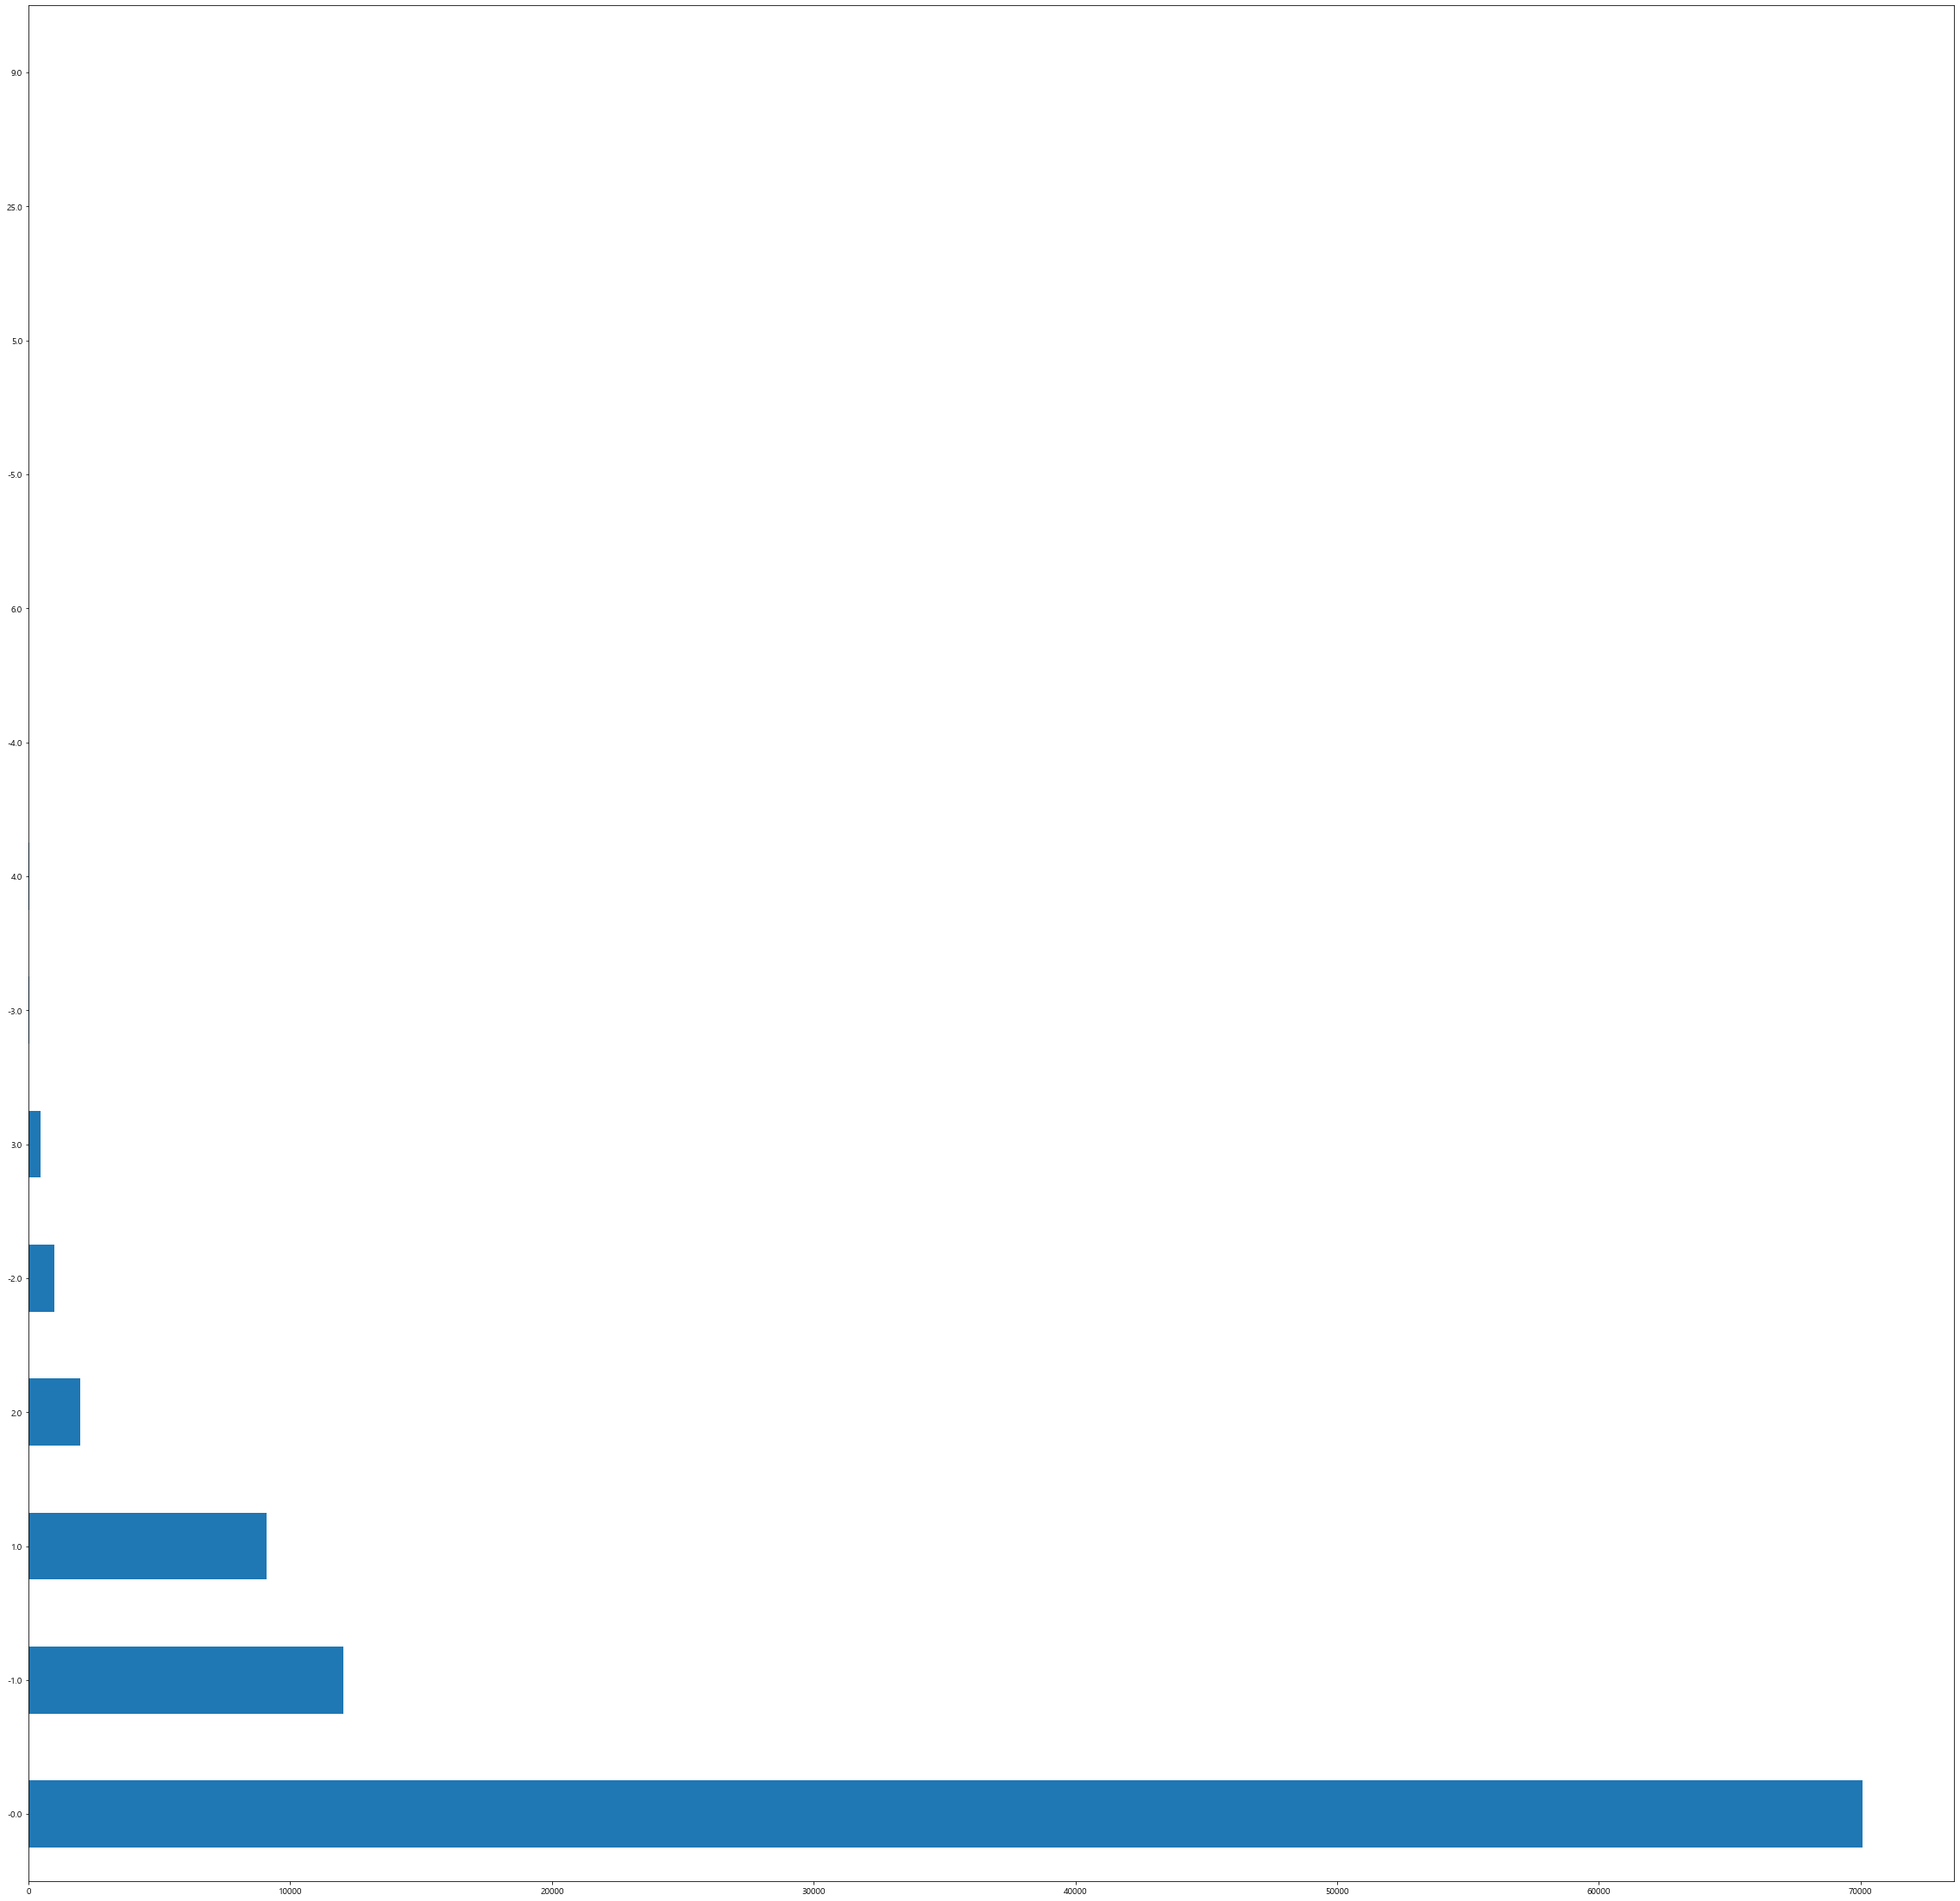

In [488]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [489]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [490]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [491]:
df_train2.round(0).value_counts()

105.0    19251
95.0     18644
96.0     14912
104.0    14476
97.0     13407
92.0     13199
108.0    12776
103.0    12567
98.0     11697
102.0    11641
94.0     11003
107.0    10837
106.0    10725
109.0    10685
91.0     10347
93.0     10268
99.0     10137
101.0    10114
100.0     9066
110.0     8043
90.0      6958
89.0      5610
111.0     5401
88.0      3810
112.0     3191
87.0      2213
113.0     1909
114.0     1586
86.0      1541
115.0     1137
85.0      1119
116.0      937
84.0       910
117.0      699
83.0       669
82.0       465
118.0      446
81.0       364
119.0      343
80.0       227
120.0      210
121.0      166
79.0       153
122.0       77
78.0        67
123.0       25
77.0        24
75.0        15
124.0       10
76.0         8
73.0         6
74.0         5
72.0         3
71.0         1
70.0         1
dtype: int64

In [492]:
y_test2.value_counts()

95.0     6517
105.0    6489
96.0     4851
104.0    4781
108.0    4554
92.0     4461
97.0     4322
103.0    4225
98.0     3836
102.0    3825
106.0    3613
94.0     3487
91.0     3452
101.0    3436
99.0     3423
107.0    3362
109.0    3343
93.0     3322
100.0    3101
90.0     2324
110.0    2310
111.0    1917
89.0     1908
112.0    1291
88.0     1259
113.0     725
87.0      680
86.0      551
114.0     537
115.0     425
85.0      419
116.0     303
84.0      297
83.0      224
117.0     218
82.0      166
118.0     161
119.0     144
81.0      115
80.0       81
120.0      80
79.0       49
121.0      44
78.0       32
122.0      21
123.0       6
77.0        6
76.0        3
73.0        2
75.0        2
124.0       1
Name: target, dtype: int64

In [493]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [494]:
df_plot.columns = ['count']

In [495]:
df_plot.reset_index(inplace=True)

In [496]:
df_plot = df_plot.sort_values('index', ascending=True)

In [497]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

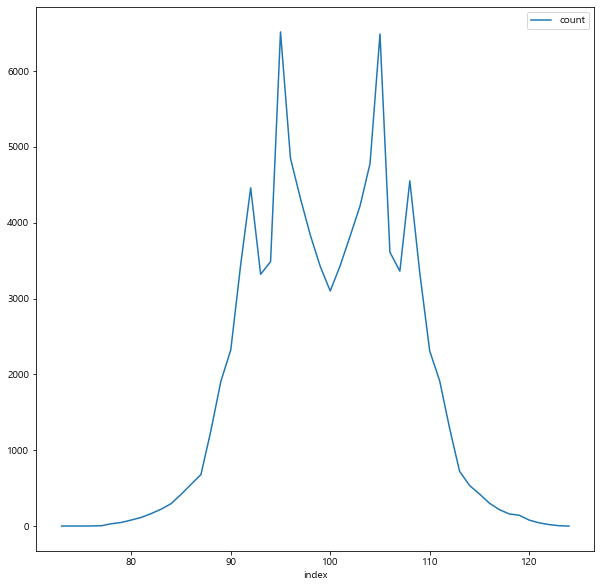

In [498]:
df_plot.plot()

In [499]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [500]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [501]:
df_test2.round(0).value_counts()

105.0    6448
95.0     6218
96.0     5042
104.0    4724
97.0     4541
92.0     4363
108.0    4251
103.0    4145
98.0     3861
102.0    3843
94.0     3682
107.0    3665
106.0    3644
109.0    3452
91.0     3423
101.0    3417
99.0     3388
93.0     3369
100.0    2956
110.0    2749
90.0     2319
89.0     1856
111.0    1791
88.0     1261
112.0    1101
87.0      713
113.0     660
114.0     532
86.0      524
85.0      420
115.0     408
116.0     299
84.0      278
117.0     232
83.0      226
118.0     164
82.0      148
119.0     138
81.0      135
80.0       81
120.0      68
121.0      50
79.0       43
78.0       28
122.0      23
77.0        8
123.0       7
76.0        3
73.0        2
74.0        1
124.0       1
dtype: int64

In [502]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [503]:
df_plot2.columns = ['count']

In [504]:
df_plot2.reset_index(inplace=True)

In [505]:
df_plot2

,0,count
0,105.0,6448
1,95.0,6218
2,96.0,5042
3,104.0,4724
4,97.0,4541
5,92.0,4363
6,108.0,4251
7,103.0,4145
8,98.0,3861
9,102.0,3843


In [506]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [507]:
df_plot2.set_index(0, inplace=True)

In [508]:
df_plot2

,count
0,
73.0,2
74.0,1
76.0,3
77.0,8
78.0,28
79.0,43
80.0,81
81.0,135
82.0,148


<AxesSubplot:xlabel='0'>

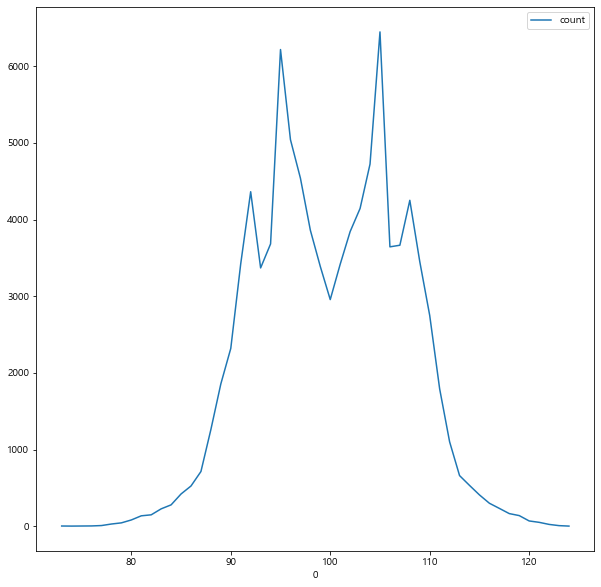

In [509]:
df_plot2.plot()

# 시각화

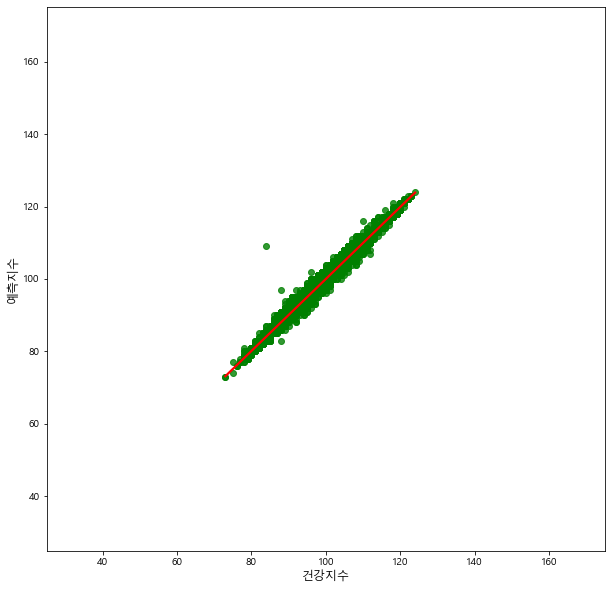

In [510]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [511]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
0,2021,53,2632765,2,26,47.00,-0.54,-0.15,0.23,20.89,9.20,3.7,-1.33,150.00,100.0,100.00,150.00,137.30,123.19,112.0
1,2023,53,2632764,2,28,82.05,-0.54,-0.15,0.23,20.80,9.23,3.7,-1.33,100.00,100.0,130.89,100.00,100.00,106.62,103.0
2,2024,53,2658222,2,29,51.00,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,144.56,100.0,100.00,100.00,100.00,109.55,105.0
3,2020,54,497669,2,30,84.00,-0.54,-0.15,0.23,16.18,9.60,3.4,-1.33,23.61,100.0,102.56,119.70,94.86,86.26,93.0
4,2022,54,1319859,2,32,244.00,-0.54,-0.15,0.23,33.30,8.40,3.9,-1.33,2.27,100.0,162.93,31.28,136.85,87.99,94.0


In [512]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328234 entries, 0 to 328233
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   검진년도             328234 non-null  int64  
 1   UID              328234 non-null  int64  
 2   CU_REC_ID        328234 non-null  int64  
 3   SEX              328234 non-null  int64  
 4   검진당시나이           328234 non-null  int64  
 5   ALP              328234 non-null  float64
 6   골밀도검사(BMD)       328234 non-null  float64
 7   골밀도검사(허리)        328234 non-null  float64
 8   골밀도검사 (T-Score)  328234 non-null  float64
 9   비타민D             328234 non-null  float64
 10  Ca(칼슘)           328234 non-null  float64
 11  P(인)             328234 non-null  float64
 12  T-Score          328234 non-null  float64
 13  ALP_kde          328234 non-null  float64
 14  T-Score_kde      328234 non-null  float64
 15  비타민D_kde         328234 non-null  float64
 16  Ca(칼슘)_kde       328234 non-null  floa

In [513]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target
71971,2021,196909,2495703,2,28,40.0,-0.54,-0.15,0.23,20.5,9.20,3.2,-1.33,132.33,100.0,129.60,138.92,55.86,112.52,106.0
71972,2022,196909,2495702,2,29,48.0,-0.54,-0.15,0.23,15.2,9.23,3.7,-1.33,149.55,100.0,97.86,100.00,100.00,110.16,105.0
71973,2023,196909,2495700,2,30,34.0,-0.54,-0.15,0.23,15.1,9.23,3.7,-1.33,102.07,100.0,100.30,100.00,100.00,100.51,100.0
71974,2024,196909,2495697,2,31,46.0,-0.54,-0.15,0.23,19.5,9.23,3.7,-1.33,149.17,100.0,110.17,100.00,100.00,112.72,106.0


In [514]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [515]:
len(df_pred2)

328234

In [516]:
df_pred2.reset_index(drop=True, inplace=True)

In [517]:
X_test2

,검진당시나이,ALP,T-Score,비타민D,Ca(칼슘),P(인)
181268,39,143.0,-1.33,20.89,8.80,3.5
234053,42,57.0,-1.33,20.89,9.00,3.6
22018,47,43.0,-1.33,20.89,8.20,3.8
154049,44,185.0,-1.33,20.89,8.90,3.6
178588,38,49.0,-1.33,20.89,9.23,3.7
...,...,...,...,...,...,...
117367,33,59.0,-1.33,20.89,9.40,3.5
200462,23,144.0,-1.33,20.89,9.00,4.2
48857,27,84.0,-1.33,20.89,8.30,3.9
217803,38,142.0,-1.33,20.89,9.00,3.5


In [518]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'ALP', '골밀도검사(BMD)',
       '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)', 'T-Score',
       'ALP_kde', 'T-Score_kde', '비타민D_kde', 'Ca(칼슘)_kde', 'P(인)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [519]:
df_pred2[train_columns]

,검진당시나이,ALP,T-Score,비타민D,Ca(칼슘),P(인)
0,26,47.00,-1.33,20.89,9.20,3.7
1,28,82.05,-1.33,20.80,9.23,3.7
2,29,51.00,-1.33,20.89,9.23,3.7
3,30,84.00,-1.33,16.18,9.60,3.4
4,32,244.00,-1.33,33.30,8.40,3.9
...,...,...,...,...,...,...
328229,36,77.00,-1.33,19.50,9.10,3.3
328230,50,57.00,-1.33,34.30,9.80,3.9
328231,57,85.00,-1.33,25.80,9.00,4.1
328232,35,93.00,-1.33,20.89,10.10,3.5


In [520]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [521]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [522]:
pred_data2

array([110.51356, 102.90603, 104.76283, ..., 104.39357,  88.59201,
       102.34552], dtype=float32)

In [523]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [524]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [525]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target,예측지수
0,2021,53,2632765,2,26,47.00,-0.54,-0.15,0.23,20.89,9.20,3.7,-1.33,150.00,100.0,100.00,150.00,137.30,123.19,112.0,110.513557
1,2023,53,2632764,2,28,82.05,-0.54,-0.15,0.23,20.80,9.23,3.7,-1.33,100.00,100.0,130.89,100.00,100.00,106.62,103.0,102.906029
2,2024,53,2658222,2,29,51.00,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,144.56,100.0,100.00,100.00,100.00,109.55,105.0,104.762833
3,2020,54,497669,2,30,84.00,-0.54,-0.15,0.23,16.18,9.60,3.4,-1.33,23.61,100.0,102.56,119.70,94.86,86.26,93.0,93.106354
4,2022,54,1319859,2,32,244.00,-0.54,-0.15,0.23,33.30,8.40,3.9,-1.33,2.27,100.0,162.93,31.28,136.85,87.99,94.0,93.463455
5,2023,54,2039511,2,33,207.00,-0.54,-0.15,0.23,20.89,8.90,3.7,-1.33,9.15,100.0,100.00,109.41,150.00,89.02,95.0,94.304268
6,2024,54,2750990,2,34,69.00,-0.54,-0.15,0.23,18.72,9.70,4.2,-1.33,74.22,100.0,106.61,82.80,71.58,89.38,95.0,95.009964
7,2022,56,1351361,2,33,30.00,-0.54,-0.15,0.23,20.89,9.40,4.0,-1.33,74.54,100.0,100.00,142.38,126.04,104.32,102.0,101.552788
8,2023,56,2032999,2,34,40.00,-0.54,-0.15,0.23,20.89,8.80,4.2,-1.33,131.56,100.0,100.00,101.37,71.58,102.90,101.0,102.089485
9,2021,59,701026,2,29,43.00,-0.54,-0.15,0.23,20.89,9.40,4.5,-1.33,145.37,100.0,100.00,149.24,51.55,109.84,105.0,104.537384


## 예측지수 성능평가

In [526]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.4085309325396091

# target으로 나이 계산

In [527]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [528]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,47.00,-0.54,-0.15,0.23,20.89,9.20,3.7,-1.33,150.00,100.0,100.00,150.00,137.30,123.19,112.0,110.513557,23.90
1,2023,53,2632764,2,28,82.05,-0.54,-0.15,0.23,20.80,9.23,3.7,-1.33,100.00,100.0,130.89,100.00,100.00,106.62,103.0,102.906029,27.42
2,2024,53,2658222,2,29,51.00,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,144.56,100.0,100.00,100.00,100.00,109.55,105.0,104.762833,28.05
3,2020,54,497669,2,30,84.00,-0.54,-0.15,0.23,16.18,9.60,3.4,-1.33,23.61,100.0,102.56,119.70,94.86,86.26,93.0,93.106354,31.38
4,2022,54,1319859,2,32,244.00,-0.54,-0.15,0.23,33.30,8.40,3.9,-1.33,2.27,100.0,162.93,31.28,136.85,87.99,94.0,93.463455,33.31
5,2023,54,2039511,2,33,207.00,-0.54,-0.15,0.23,20.89,8.90,3.7,-1.33,9.15,100.0,100.00,109.41,150.00,89.02,95.0,94.304268,34.14
6,2024,54,2750990,2,34,69.00,-0.54,-0.15,0.23,18.72,9.70,4.2,-1.33,74.22,100.0,106.61,82.80,71.58,89.38,95.0,95.009964,35.00
7,2022,56,1351361,2,33,30.00,-0.54,-0.15,0.23,20.89,9.40,4.0,-1.33,74.54,100.0,100.00,142.38,126.04,104.32,102.0,101.552788,32.69
8,2023,56,2032999,2,34,40.00,-0.54,-0.15,0.23,20.89,8.80,4.2,-1.33,131.56,100.0,100.00,101.37,71.58,102.90,101.0,102.089485,33.58
9,2021,59,701026,2,29,43.00,-0.54,-0.15,0.23,20.89,9.40,4.5,-1.33,145.37,100.0,100.00,149.24,51.55,109.84,105.0,104.537384,28.09


## 예측나이 성능평가

In [529]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.1791758014099698

# 최종 산출

In [530]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,ALP_kde,T-Score_kde,비타민D_kde,Ca(칼슘)_kde,P(인)_kde,kde_mean,target,예측지수,예측나이
0,2021,53,2632765,2,26,47.00,-0.54,-0.15,0.23,20.89,9.20,3.7,-1.33,150.00,100.0,100.00,150.00,137.30,123.19,112.0,110.513557,23.90
1,2023,53,2632764,2,28,82.05,-0.54,-0.15,0.23,20.80,9.23,3.7,-1.33,100.00,100.0,130.89,100.00,100.00,106.62,103.0,102.906029,27.42
2,2024,53,2658222,2,29,51.00,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,144.56,100.0,100.00,100.00,100.00,109.55,105.0,104.762833,28.05
3,2020,54,497669,2,30,84.00,-0.54,-0.15,0.23,16.18,9.60,3.4,-1.33,23.61,100.0,102.56,119.70,94.86,86.26,93.0,93.106354,31.38
4,2022,54,1319859,2,32,244.00,-0.54,-0.15,0.23,33.30,8.40,3.9,-1.33,2.27,100.0,162.93,31.28,136.85,87.99,94.0,93.463455,33.31


# DataMart csv

In [531]:
df_copy = df.copy()

In [532]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인)
0,2010,7282,2520,1,42,63.0,NaN,NaN,NaN,NaN,9.0,4.1
1,2010,7490,3638,1,39,164.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,7915,3997,1,36,184.0,NaN,NaN,NaN,NaN,9.6,3.5
3,2010,8056,4745,1,42,165.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8457,3929,1,38,147.0,NaN,NaN,NaN,NaN,9.5,2.6


In [533]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   검진년도             1213899 non-null  int64  
 1   UID              1213899 non-null  int64  
 2   CU_REC_ID        1213899 non-null  int64  
 3   SEX              1213899 non-null  int64  
 4   검진당시나이           1213899 non-null  int64  
 5   ALP              1073547 non-null  float64
 6   골밀도검사(BMD)       16652 non-null    float64
 7   골밀도검사(허리)        54723 non-null    float64
 8   골밀도검사 (T-Score)  26941 non-null    float64
 9   비타민D             231397 non-null   float64
 10  Ca(칼슘)           895500 non-null   float64
 11  P(인)             869636 non-null   float64
dtypes: float64(7), int64(5)
memory usage: 111.1 MB


In [534]:
minimums

[-67.0,
 -3.8999999999999995,
 -5.35,
 -2.95,
 -3.914999999999999,
 8.100000000000001,
 2.3999999999999995]

In [535]:
maximums

[253.0, 3.3, 7.049999999999999, 3.05, 46.525, 10.5, 4.8]

In [536]:
train_columns

['검진당시나이', 'ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [537]:
target_cols

['ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

## 변수 생성

In [538]:
df_copy['T-Score'] = df_copy['골밀도검사(BMD)'] + df_copy['골밀도검사(허리)'] + df_copy['골밀도검사 (T-Score)']

In [539]:
df_copy['T-Score'] = df_copy['T-Score'].round(2)

In [540]:
df_copy.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'ALP', '골밀도검사(BMD)',
       '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)', 'T-Score'],
      dtype='object')

In [541]:
for idx, col in enumerate(target_cols):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [542]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [543]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score
10,2010,15894,2533,2,29,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,2010,42223,1364,2,24,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,2011,364096,6645,2,32,137.0,NaN,NaN,NaN,NaN,3.05,3.5,NaN
45,2010,120518,3595,2,30,122.0,NaN,NaN,NaN,NaN,3.05,3.3,NaN
63,2011,698706,6600,2,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 검진 항목 all 결측치 지우기

In [544]:
target_cols

['ALP', 'T-Score', '비타민D', 'Ca(칼슘)', 'P(인)']

In [545]:
df_woman_csv.dropna(subset=target_cols, how='all', inplace=True)

In [546]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [547]:
len(df_woman_csv)

406621

## fillna

In [548]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'ALP', '골밀도검사(BMD)',
       '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)', 'T-Score',
       'ALP_kde', 'T-Score_kde', '비타민D_kde', 'Ca(칼슘)_kde', 'P(인)_kde',
       'kde_mean', 'target'],
      dtype='object')

In [549]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', 'ALP', '골밀도검사(BMD)',
       '골밀도검사(허리)', '골밀도검사 (T-Score)', '비타민D', 'Ca(칼슘)', 'P(인)', 'T-Score'],
      dtype='object')

In [550]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## ALP 스크리닝

In [551]:
screening = 30

In [552]:
scr_col = 'ALP'

In [553]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score
38,2010,706074,3749,2,30,28.0,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33
271,2019,69,1484771,2,33,28.0,-0.54,-0.15,0.23,7.05,3.05,3.7,-1.33
299,2019,34828,2185591,2,36,26.0,-0.54,-0.15,0.23,20.89,3.05,3.7,-1.33
339,2019,7645,423310,2,33,27.0,-0.54,-0.15,0.23,20.89,3.05,3.7,-1.33
381,2019,7998,325153,2,30,26.0,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33


In [554]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

5110

In [555]:
df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [556]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score


In [557]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

In [558]:
len(df_woman_csv)

406621

## 비타민D 스크리닝

In [559]:
screening = 100

In [560]:
scr_col = '비타민D'

In [561]:
df_woman_csv[df_woman_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score


In [562]:
len(df_woman_csv[df_woman_csv[scr_col] > screening])

0

In [563]:
df_woman_csv.loc[df_woman_csv[scr_col] > screening, scr_col] = screening

In [564]:
df_woman_csv[df_woman_csv[scr_col] > screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score


In [565]:
len(df_woman_csv[df_woman_csv[scr_col] > screening])

0

In [566]:
len(df_woman_csv)

406621

## 모델 예측

In [567]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [568]:
pred_data2 = pred_data2.round(0)

In [569]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [570]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수
0,2010,15894,2533,2,29,104.0,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,91.0
1,2010,42223,1364,2,24,140.0,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,92.0
2,2011,364096,6645,2,32,137.0,-0.54,-0.15,0.23,20.89,3.05,3.5,-1.33,88.0
3,2010,120518,3595,2,30,122.0,-0.54,-0.15,0.23,20.89,3.05,3.3,-1.33,83.0
4,2010,167053,3087,2,26,155.0,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,92.0


### 성능 평가

In [571]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [572]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [573]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [574]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 1.702245088177935


In [575]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9383728083414453

In [576]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
0,2010,15894,2533,2,29,104.0,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,91.0,30.8
1,2010,42223,1364,2,24,140.0,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,92.0,25.6
2,2011,364096,6645,2,32,137.0,-0.54,-0.15,0.23,20.89,3.05,3.5,-1.33,88.0,34.4
3,2010,120518,3595,2,30,122.0,-0.54,-0.15,0.23,20.89,3.05,3.3,-1.33,83.0,33.4
4,2010,167053,3087,2,26,155.0,-0.54,-0.15,0.23,20.89,9.23,3.7,-1.33,92.0,27.6


In [577]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406621 entries, 0 to 406620
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   검진년도             406621 non-null  int64  
 1   UID              406621 non-null  int64  
 2   CU_REC_ID        406621 non-null  int64  
 3   SEX              406621 non-null  int64  
 4   검진당시나이           406621 non-null  int64  
 5   ALP              406621 non-null  float64
 6   골밀도검사(BMD)       406621 non-null  float64
 7   골밀도검사(허리)        406621 non-null  float64
 8   골밀도검사 (T-Score)  406621 non-null  float64
 9   비타민D             406621 non-null  float64
 10  Ca(칼슘)           406621 non-null  float64
 11  P(인)             406621 non-null  float64
 12  T-Score          406621 non-null  float64
 13  예측지수             406621 non-null  float32
 14  예측나이             406621 non-null  float64
dtypes: float32(1), float64(9), int64(5)
memory usage: 45.0 MB


# 최종 UID별 확인

In [578]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
107678,2021,261581,806568,2,50,60.0,-0.54,-0.15,0.23,7.05,3.05,3.6,-1.33,96.0,50.8
107686,2021,261581,2243879,2,50,60.0,-0.54,-0.15,0.23,7.05,3.05,3.6,-1.33,96.0,50.8
107687,2021,261581,2418909,2,50,60.0,-0.54,-0.15,0.23,7.05,3.05,3.6,-1.33,96.0,50.8
107688,2021,261581,2418910,2,50,60.0,-0.54,-0.15,0.23,7.05,3.05,3.6,-1.33,96.0,50.8
167991,2022,261581,751339,2,51,71.0,-0.54,-0.15,0.23,20.89,3.05,4.0,-1.33,98.0,51.4
167994,2022,261581,2243878,2,51,71.0,-0.54,-0.15,0.23,20.89,3.05,4.0,-1.33,98.0,51.4
257242,2023,261581,1519764,2,52,68.0,-0.54,-0.15,0.23,7.05,3.05,4.1,-1.33,93.0,53.4
257243,2023,261581,2243877,2,52,68.0,-0.54,-0.15,0.23,7.05,3.05,4.1,-1.33,93.0,53.4
372980,2024,261581,2418911,2,53,60.0,-0.54,-0.15,0.23,7.05,3.05,3.8,-1.33,93.0,54.4


In [579]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
53665,2022,477944,956268,2,31,30.0,-0.54,-0.15,0.23,7.05,3.05,3.7,-1.33,88.0,33.4
198894,2022,477944,2212776,2,31,30.0,-0.54,-0.15,0.23,7.05,3.05,3.7,-1.33,88.0,33.4
300494,2023,477944,1454346,2,32,31.0,-0.54,-0.15,0.23,7.05,3.05,4.1,-1.33,86.0,34.8
300495,2023,477944,2212775,2,32,31.0,-0.54,-0.15,0.23,7.05,3.05,4.1,-1.33,86.0,34.8
385265,2024,477944,2362855,2,33,35.0,-0.54,-0.15,0.23,7.05,3.05,5.1,-1.33,83.0,36.4


In [580]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,ALP,골밀도검사(BMD),골밀도검사(허리),골밀도검사 (T-Score),비타민D,Ca(칼슘),P(인),T-Score,예측지수,예측나이
325605,2023,896916,1459636,2,28,64.0,-0.54,-0.15,0.23,7.05,3.05,3.8,-1.33,90.0,30.0
325594,2023,896916,1842092,2,28,64.0,-0.54,-0.15,0.23,7.05,3.05,3.8,-1.33,90.0,30.0
325606,2023,896916,2031853,2,28,64.0,-0.54,-0.15,0.23,7.05,3.05,3.8,-1.33,90.0,30.0
325607,2023,896916,2253054,2,28,64.0,-0.54,-0.15,0.23,7.05,3.05,3.8,-1.33,90.0,30.0
319904,2023,896916,2257188,2,28,64.0,-0.54,-0.15,0.23,7.05,3.05,3.8,-1.33,90.0,30.0
396035,2024,896916,2253058,2,29,55.0,-0.54,-0.15,0.23,7.05,3.05,3.1,-1.33,85.0,32.0


# 최종 CSV 병합 Extract

In [581]:
len(df_man_csv)

702899

In [582]:
len(df_woman_csv)

406621

In [583]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [584]:
df_csv.to_csv(csv_path)